# **Credit Scorecard Model**

Author : Althaaf Athaayaa Daffa Qushayyizidane 

---

### **Background**

>I am involved in a project with the company Home Credit Indonesia. I will be collaborating with various other departments in this project to provide technology solutions for the company. I was asked to build a credit score model to ensure that customers who are able to make repayments are not rejected when applying for a loan, and that loans are given with a principal, maturity, and repayment calendar that will motivate customers to succeed. In addition, I also had to provide business recommendations for the company.<br>

## **Import Library**

---

In [3]:
# Melakukan import library
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from scipy.stats import boxcox
from imblearn import under_sampling, over_sampling
import gdown
from sklearn.model_selection import train_test_split

from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix, fbeta_score, make_scorer
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import cross_validate, RandomizedSearchCV, GridSearchCV, HalvingGridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier, reset_parameter, LGBMClassifier

import shap

from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform

In [4]:
sns.set_theme(rc={'figure.figsize':(20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

## **LOAD DATA**
---

In [5]:
dataframe_train = pd.read_csv("application_train.csv")

In [6]:
dataframe_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## **DATA EXPLORATION**

>### **Exploratory Data Analysis**

In [7]:
dataframe_train_eda = dataframe_train.copy()

**Descriptive Statistic**

---

In [8]:
dataframe_train_eda.describe().transpose()[['mean', '50%']]

,mean,50%
SK_ID_CURR,278180.518577,278202.0
TARGET,0.080729,0.0
CNT_CHILDREN,0.417052,0.0
AMT_INCOME_TOTAL,168797.919297,147150.0
AMT_CREDIT,599025.999706,513531.0
...,...,...
AMT_REQ_CREDIT_BUREAU_DAY,0.007000,0.0
AMT_REQ_CREDIT_BUREAU_WEEK,0.034362,0.0
AMT_REQ_CREDIT_BUREAU_MON,0.267395,0.0
AMT_REQ_CREDIT_BUREAU_QRT,0.265474,0.0


In [9]:
dataframe_train_eda.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

- Terdapat **122** kolom dan **307511** baris pada data.
- Dataframe memiliki **65** float kolom, **41** kolom numerik, dan **16** kolom kategorikal.

**Checking Duplicate**

---

In [10]:
dataframe_train_eda.duplicated().sum()

0

Secara keseluruhan, **tidak terdapat data duplikat** pada dataset

**Statistical Summary**

---

In [11]:
for column in dataframe_train_eda.columns:
    print(f"============= {column} =================")
    display(dataframe_train_eda[column].value_counts())
    print()

============= SK_ID_CURR =================


100002    1
337664    1
337661    1
337660    1
337659    1
         ..
218992    1
218991    1
218990    1
218989    1
456255    1
Name: SK_ID_CURR, Length: 307511, dtype: int64


============= TARGET =================


0    282686
1     24825
Name: TARGET, dtype: int64


============= NAME_CONTRACT_TYPE =================


Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64


============= CODE_GENDER =================


F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64


============= FLAG_OWN_CAR =================


N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64


============= FLAG_OWN_REALTY =================


Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64


============= CNT_CHILDREN =================


0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
8          2
9          2
12         2
10         2
19         2
11         1
Name: CNT_CHILDREN, dtype: int64


============= AMT_INCOME_TOTAL =================


135000.0    35750
112500.0    31019
157500.0    26556
180000.0    24719
90000.0     22483
            ...  
117324.0        1
64584.0         1
142897.5        1
109170.0        1
113062.5        1
Name: AMT_INCOME_TOTAL, Length: 2548, dtype: int64


============= AMT_CREDIT =================


450000.0     9709
675000.0     8877
225000.0     8162
180000.0     7342
270000.0     7241
             ... 
487318.5        1
630400.5        1
1875276.0       1
1395895.5       1
1391130.0       1
Name: AMT_CREDIT, Length: 5603, dtype: int64


============= AMT_ANNUITY =================


9000.0      6385
13500.0     5514
6750.0      2279
10125.0     2035
37800.0     1602
            ... 
79902.0        1
106969.5       1
60885.0        1
59661.0        1
77809.5        1
Name: AMT_ANNUITY, Length: 13672, dtype: int64


============= AMT_GOODS_PRICE =================


450000.0     26022
225000.0     25282
675000.0     24962
900000.0     15416
270000.0     11428
             ...  
1265751.0        1
503266.5         1
810778.5         1
666090.0         1
743863.5         1
Name: AMT_GOODS_PRICE, Length: 1002, dtype: int64


============= NAME_TYPE_SUITE =================


Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64


============= NAME_INCOME_TYPE =================


Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64


============= NAME_EDUCATION_TYPE =================


Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: NAME_EDUCATION_TYPE, dtype: int64


============= NAME_FAMILY_STATUS =================


Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64


============= NAME_HOUSING_TYPE =================


House / apartment      272868
With parents            14840
Municipal apartment     11183
Rented apartment         4881
Office apartment         2617
Co-op apartment          1122
Name: NAME_HOUSING_TYPE, dtype: int64


============= REGION_POPULATION_RELATIVE =================


0.035792    16408
0.046220    13442
0.030755    12163
0.025164    11950
0.026392    11601
            ...  
0.001417      467
0.001333      235
0.000533       39
0.000938       28
0.000290        2
Name: REGION_POPULATION_RELATIVE, Length: 81, dtype: int64


============= DAYS_BIRTH =================


-13749    43
-13481    42
-18248    41
-10020    41
-15771    40
          ..
-24898     1
-24868     1
-8017      1
-25098     1
-25061     1
Name: DAYS_BIRTH, Length: 17460, dtype: int64


============= DAYS_EMPLOYED =================


 365243    55374
-200         156
-224         152
-230         151
-199         151
           ...  
-13961         1
-11827         1
-10176         1
-9459          1
-8694          1
Name: DAYS_EMPLOYED, Length: 12574, dtype: int64


============= DAYS_REGISTRATION =================


-1.0        113
-7.0         98
-6.0         96
-4.0         92
-2.0         92
           ... 
-15581.0      1
-15031.0      1
-14804.0      1
-15008.0      1
-14798.0      1
Name: DAYS_REGISTRATION, Length: 15688, dtype: int64


============= DAYS_ID_PUBLISH =================


-4053    169
-4095    162
-4046    161
-4417    159
-4256    158
        ... 
-5896      1
-5921      1
-5753      1
-5960      1
-6211      1
Name: DAYS_ID_PUBLISH, Length: 6168, dtype: int64


============= OWN_CAR_AGE =================


7.0     7424
6.0     6382
3.0     6370
8.0     5887
2.0     5852
        ... 
69.0       1
50.0       1
47.0       1
48.0       1
52.0       1
Name: OWN_CAR_AGE, Length: 62, dtype: int64


============= FLAG_MOBIL =================


1    307510
0         1
Name: FLAG_MOBIL, dtype: int64


============= FLAG_EMP_PHONE =================


1    252125
0     55386
Name: FLAG_EMP_PHONE, dtype: int64


============= FLAG_WORK_PHONE =================


0    246203
1     61308
Name: FLAG_WORK_PHONE, dtype: int64


============= FLAG_CONT_MOBILE =================


1    306937
0       574
Name: FLAG_CONT_MOBILE, dtype: int64


============= FLAG_PHONE =================


0    221080
1     86431
Name: FLAG_PHONE, dtype: int64


============= FLAG_EMAIL =================


0    290069
1     17442
Name: FLAG_EMAIL, dtype: int64


============= OCCUPATION_TYPE =================


Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64


============= CNT_FAM_MEMBERS =================


2.0     158357
1.0      67847
3.0      52601
4.0      24697
5.0       3478
6.0        408
7.0         81
8.0         20
9.0          6
10.0         3
14.0         2
12.0         2
20.0         2
16.0         2
13.0         1
15.0         1
11.0         1
Name: CNT_FAM_MEMBERS, dtype: int64


============= REGION_RATING_CLIENT =================


2    226984
3     48330
1     32197
Name: REGION_RATING_CLIENT, dtype: int64


============= REGION_RATING_CLIENT_W_CITY =================


2    229484
3     43860
1     34167
Name: REGION_RATING_CLIENT_W_CITY, dtype: int64


============= WEEKDAY_APPR_PROCESS_START =================


TUESDAY      53901
WEDNESDAY    51934
MONDAY       50714
THURSDAY     50591
FRIDAY       50338
SATURDAY     33852
SUNDAY       16181
Name: WEEKDAY_APPR_PROCESS_START, dtype: int64


============= HOUR_APPR_PROCESS_START =================


10    37722
11    37229
12    34233
13    30959
14    27682
9     27384
15    24839
16    20385
8     15127
17    14900
7      9131
18     9049
6      5842
19     3848
5      3638
4      2090
3      1230
20     1196
21      405
2       305
22      150
1        86
23       41
0        40
Name: HOUR_APPR_PROCESS_START, dtype: int64


============= REG_REGION_NOT_LIVE_REGION =================


0    302854
1      4657
Name: REG_REGION_NOT_LIVE_REGION, dtype: int64


============= REG_REGION_NOT_WORK_REGION =================


0    291899
1     15612
Name: REG_REGION_NOT_WORK_REGION, dtype: int64


============= LIVE_REGION_NOT_WORK_REGION =================


0    295008
1     12503
Name: LIVE_REGION_NOT_WORK_REGION, dtype: int64


============= REG_CITY_NOT_LIVE_CITY =================


0    283472
1     24039
Name: REG_CITY_NOT_LIVE_CITY, dtype: int64


============= REG_CITY_NOT_WORK_CITY =================


0    236644
1     70867
Name: REG_CITY_NOT_WORK_CITY, dtype: int64


============= LIVE_CITY_NOT_WORK_CITY =================


0    252296
1     55215
Name: LIVE_CITY_NOT_WORK_CITY, dtype: int64


============= ORGANIZATION_TYPE =================


Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor


============= EXT_SOURCE_1 =================


0.622707    5
0.443982    5
0.546426    5
0.581015    5
0.499002    5
           ..
0.658473    1
0.318295    1
0.834644    1
0.485406    1
0.734460    1
Name: EXT_SOURCE_1, Length: 114584, dtype: int64


============= EXT_SOURCE_2 =================


0.285898    721
0.262258    417
0.265256    343
0.159679    322
0.265312    306
           ... 
0.004725      1
0.257313      1
0.282030      1
0.181540      1
0.267834      1
Name: EXT_SOURCE_2, Length: 119831, dtype: int64


============= EXT_SOURCE_3 =================


0.746300    1460
0.713631    1315
0.694093    1276
0.670652    1191
0.652897    1154
            ... 
0.021492       1
0.019468       1
0.023062       1
0.014556       1
0.043227       1
Name: EXT_SOURCE_3, Length: 814, dtype: int64


============= APARTMENTS_AVG =================


0.0825    6663
0.0619    6332
0.0928    4404
0.0722    3986
0.0082    3507
          ... 
0.3727       1
0.1075       1
0.7165       1
0.8237       1
0.3466       1
Name: APARTMENTS_AVG, Length: 2339, dtype: int64


============= BASEMENTAREA_AVG =================


0.0000    14745
0.0545      251
0.0818      251
0.0727      248
0.1091      246
          ...  
0.2999        1
0.2737        1
0.4696        1
0.2992        1
0.6360        1
Name: BASEMENTAREA_AVG, Length: 3780, dtype: int64


============= YEARS_BEGINEXPLUATATION_AVG =================


0.9871    4311
0.9856    4189
0.9861    4171
0.9801    4123
0.9866    4114
          ... 
0.8992       1
0.8276       1
0.3279       1
0.6577       1
0.8629       1
Name: YEARS_BEGINEXPLUATATION_AVG, Length: 285, dtype: int64


============= YEARS_BUILD_AVG =================


0.8232    2999
0.8164    2864
0.8028    2848
0.7280    2802
0.7348    2761
          ... 
0.1976       2
0.3744       2
0.0004       2
0.0276       1
0.0208       1
Name: YEARS_BUILD_AVG, Length: 149, dtype: int64


============= COMMONAREA_AVG =================


0.0000    8442
0.0079     544
0.0078     475
0.0080     446
0.0077     414
          ... 
0.2299       1
0.2496       1
0.2737       1
0.3814       1
0.1620       1
Name: COMMONAREA_AVG, Length: 3181, dtype: int64


============= ELEVATORS_AVG =================


0.0000    85718
0.0800     9886
0.1600     8806
0.2400     6071
0.1200     5593
          ...  
0.2284        1
0.0828        1
0.0232        1
0.0180        1
0.0528        1
Name: ELEVATORS_AVG, Length: 257, dtype: int64


============= ENTRANCES_AVG =================


0.1379    34007
0.0690    22956
0.1034    19533
0.2069    19062
0.0345    15380
          ...  
0.0355        1
0.1645        1
0.2145        1
0.1341        1
0.1059        1
Name: ENTRANCES_AVG, Length: 285, dtype: int64


============= FLOORSMAX_AVG =================


0.1667    61875
0.3333    31909
0.0417    14600
0.3750     7926
0.1250     6974
          ...  
0.1792        1
0.2200        1
0.1133        1
0.0900        1
0.2042        1
Name: FLOORSMAX_AVG, Length: 403, dtype: int64


============= FLOORSMIN_AVG =================


0.2083    32875
0.3750    17845
0.0417    17776
0.0833     5086
0.4167     3961
          ...  
0.3175        1
0.1212        1
0.0138        1
0.3000        1
0.2283        1
Name: FLOORSMIN_AVG, Length: 305, dtype: int64


============= LANDAREA_AVG =================


0.0000    15600
0.0631      189
0.0316      187
0.0473      186
0.0174      180
          ...  
0.2617        1
0.2539        1
0.2416        1
0.3417        1
0.3130        1
Name: LANDAREA_AVG, Length: 3527, dtype: int64


============= LIVINGAPARTMENTS_AVG =================


0.0504    4272
0.0672    4231
0.0756    2778
0.0588    2586
0.0841    1864
          ... 
0.7128       1
0.1401       1
0.5085       1
0.1575       1
0.1543       1
Name: LIVINGAPARTMENTS_AVG, Length: 1868, dtype: int64


============= LIVINGAREA_AVG =================


0.0000    284
0.0512    243
0.0510    223
0.0702    223
0.0509    221
         ... 
0.3750      1
0.5441      1
0.4038      1
0.3755      1
0.9279      1
Name: LIVINGAREA_AVG, Length: 5199, dtype: int64


============= NONLIVINGAPARTMENTS_AVG =================


0.0000    54549
0.0039    13606
0.0077     6351
0.0116     3714
0.0154     2533
          ...  
0.2664        1
0.0323        1
0.0946        1
0.0091        1
0.0319        1
Name: NONLIVINGAPARTMENTS_AVG, Length: 386, dtype: int64


============= NONLIVINGAREA_AVG =================


0.0000    58735
0.0012      546
0.0044      454
0.0022      440
0.0031      415
          ...  
0.2989        1
0.1611        1
0.6946        1
0.2554        1
0.2879        1
Name: NONLIVINGAREA_AVG, Length: 3290, dtype: int64


============= APARTMENTS_MODE =================


0.0840    7522
0.0630    7451
0.0945    4757
0.0735    4388
0.0084    3970
          ... 
0.8445       1
0.9181       1
0.7458       1
0.8971       1
0.6586       1
Name: APARTMENTS_MODE, Length: 760, dtype: int64


============= BASEMENTAREA_MODE =================


0.0000    16598
0.0566      269
0.0849      265
0.0642      253
0.0830      251
          ...  
0.4523        1
0.5393        1
0.3808        1
0.3408        1
0.2808        1
Name: BASEMENTAREA_MODE, Length: 3841, dtype: int64


============= YEARS_BEGINEXPLUATATION_MODE =================


0.9871    4291
0.9866    4173
0.9861    4167
0.9801    4110
0.9806    4083
          ... 
0.4518       1
0.4359       1
0.8987       1
0.9166       1
0.8937       1
Name: YEARS_BEGINEXPLUATATION_MODE, Length: 221, dtype: int64


============= YEARS_BUILD_MODE =================


0.8301    2960
0.8236    2879
0.7387    2789
0.8171    2763
0.8105    2755
          ... 
0.0853       2
0.0591       1
0.0983       1
0.0657       1
0.0330       1
Name: YEARS_BUILD_MODE, Length: 154, dtype: int64


============= COMMONAREA_MODE =================


0.0000    9690
0.0080     546
0.0079     543
0.0078     518
0.0081     416
          ... 
0.2154       1
0.2090       1
0.2568       1
0.2995       1
0.1635       1
Name: COMMONAREA_MODE, Length: 3128, dtype: int64


============= ELEVATORS_MODE =================


0.0000    89498
0.0806    11629
0.1611     9675
0.2417     6379
0.1208     5734
0.0403     4876
0.2014     3962
0.3222     2887
0.2820     2135
0.4028     1554
0.3625     1308
0.4834     1094
0.4431      628
0.5639      491
0.6445      447
0.5236      253
0.6042      226
0.7250      219
1.0000      144
0.8056      137
0.6848       99
0.9667       87
0.8862       66
0.7653       38
0.8459       34
0.9264       20
Name: ELEVATORS_MODE, dtype: int64


============= ENTRANCES_MODE =================


0.1379    36041
0.0690    26704
0.1034    20533
0.2069    19678
0.0345    19428
0.1724     8986
0.2759     8036
0.2414     4013
0.3448     2046
0.3103     2014
0.4138     1212
0.3793      977
0.4828      500
0.4483      431
0.0000      387
0.5517      351
0.5172      301
0.6207      241
0.5862      186
1.0000      152
0.6897      116
0.6552       65
0.8966       52
0.7586       48
0.7241       44
0.8276       42
0.7931       39
0.9655       25
0.9310       21
0.8621       14
Name: ENTRANCES_MODE, dtype: int64


============= FLOORSMAX_MODE =================


0.1667    65550
0.3333    34373
0.0417    15616
0.3750     8321
0.1250     7267
0.0833     6785
0.0000     3415
0.4583     3216
0.6250     2075
0.5417     1836
0.6667     1710
0.2083     1505
0.2500      572
0.2917      511
0.5833      391
0.4167      236
0.8750      229
0.7083      199
0.5000      184
1.0000      164
0.7500      124
0.9583       94
0.7917       58
0.9167       38
0.8333       22
Name: FLOORSMAX_MODE, dtype: int64


============= FLOORSMIN_MODE =================


0.2083    34403
0.3750    19042
0.0417    18917
0.0833     5349
0.4167     4105
0.1667     3636
0.1250     3170
0.0000     2517
0.5000     1889
0.6667     1264
0.7083     1143
0.5833     1051
0.2500      772
0.2917      359
0.3333      320
0.6250      207
1.0000      141
0.5417      140
0.9167      131
0.4583      105
0.7500       99
0.7917       61
0.8333       22
0.9583       17
0.8750        9
Name: FLOORSMIN_MODE, dtype: int64


============= LANDAREA_MODE =================


0.0000    17453
0.0194      208
0.0645      193
0.0484      192
0.0323      188
          ...  
0.2428        1
0.4716        1
0.6044        1
0.3757        1
0.2723        1
Name: LANDAREA_MODE, Length: 3563, dtype: int64


============= LIVINGAPARTMENTS_MODE =================


0.0551    4931
0.0735    4797
0.0826    2966
0.0643    2853
0.0918    2069
          ... 
0.7062       1
0.6042       1
0.5638       1
0.6795       1
0.6538       1
Name: LIVINGAPARTMENTS_MODE, Length: 736, dtype: int64


============= LIVINGAREA_MODE =================


0.0000    444
0.0530    272
0.0532    262
0.0529    249
0.0533    242
         ... 
0.3526      1
0.7223      1
0.4394      1
0.7364      1
0.9667      1
Name: LIVINGAREA_MODE, Length: 5301, dtype: int64


============= NONLIVINGAPARTMENTS_MODE =================


0.0000    59255
0.0039    14105
0.0078     6413
0.0117     3675
0.0156     2492
          ...  
0.5953        1
0.7626        1
0.7082        1
0.4708        1
0.6070        1
Name: NONLIVINGAPARTMENTS_MODE, Length: 167, dtype: int64


============= NONLIVINGAREA_MODE =================


0.0000    67126
0.0011      477
0.0046      466
0.0033      430
0.0012      427
          ...  
0.1908        1
0.5423        1
0.2705        1
0.2391        1
0.4109        1
Name: NONLIVINGAREA_MODE, Length: 3327, dtype: int64


============= APARTMENTS_MEDI =================


0.0833    7109
0.0625    6687
0.0937    4622
0.0729    4211
0.0083    3562
          ... 
0.6225       1
0.7724       1
0.7234       1
0.8889       1
0.3024       1
Name: APARTMENTS_MEDI, Length: 1148, dtype: int64


============= BASEMENTAREA_MEDI =================


0.0000    14991
0.0818      271
0.1091      266
0.0545      265
0.0727      248
          ...  
0.6082        1
0.3250        1
0.5008        1
0.2801        1
0.2733        1
Name: BASEMENTAREA_MEDI, Length: 3772, dtype: int64


============= YEARS_BEGINEXPLUATATION_MEDI =================


0.9871    4314
0.9861    4247
0.9856    4199
0.9866    4138
0.9801    4115
          ... 
0.9076       1
0.5315       1
0.4938       1
0.9056       1
0.8629       1
Name: YEARS_BEGINEXPLUATATION_MEDI, Length: 245, dtype: int64


============= YEARS_BUILD_MEDI =================


0.8256    2994
0.8189    2883
0.8054    2842
0.7316    2799
0.8121    2784
          ... 
0.0607       2
0.3828       2
0.0406       1
0.0339       1
0.0071       1
Name: YEARS_BUILD_MEDI, Length: 151, dtype: int64


============= COMMONAREA_MEDI =================


0.0000    8691
0.0079     581
0.0080     486
0.0078     481
0.0014     377
          ... 
0.6284       1
0.4041       1
0.2683       1
0.2733       1
0.1648       1
Name: COMMONAREA_MEDI, Length: 3202, dtype: int64


============= ELEVATORS_MEDI =================


0.00    87026
0.08    10832
0.16     9278
0.24     6392
0.12     5946
0.04     4852
0.20     4162
0.32     2937
0.28     2317
0.40     1604
0.36     1405
0.48     1096
0.44      715
0.10      543
0.56      493
0.64      454
0.14      388
0.06      388
0.02      368
0.52      290
0.18      280
0.60      248
0.22      226
0.72      224
1.00      158
0.26      145
0.80      140
0.68      112
0.30       94
0.96       81
0.34       80
0.88       68
0.38       62
0.76       45
0.42       32
0.84       32
0.46       23
0.92       20
0.50       16
0.54       10
0.78       10
0.58        6
0.74        6
0.90        6
0.66        5
0.62        5
Name: ELEVATORS_MEDI, dtype: int64


============= ENTRANCES_MEDI =================


0.1379    35535
0.0690    24193
0.1034    20492
0.2069    19750
0.0345    16150
0.1724     9566
0.2759     8048
0.2414     4318
0.3448     2108
0.3103     2086
0.0862     1352
0.1207     1228
0.4138     1198
0.3793     1010
0.1552      788
0.0517      611
0.1897      554
0.4828      503
0.4483      438
0.5517      352
0.0000      329
0.5172      304
0.2241      278
0.6207      241
0.5862      187
0.2586      169
1.0000      153
0.6897      116
0.2931      106
0.6552       68
0.3276       59
0.8966       52
0.7586       48
0.7241       44
0.8276       42
0.3621       39
0.7931       39
0.4310       31
0.9655       25
0.9310       21
0.3966       14
0.8621       14
0.4655       12
0.0172        7
0.5690        4
0.5000        1
Name: ENTRANCES_MEDI, dtype: int64


============= FLOORSMAX_MEDI =================


0.1667    63607
0.3333    33279
0.0417    14832
0.3750     8207
0.1250     7079
0.0833     6657
0.4583     3089
0.0000     2995
0.6250     2042
0.5417     1860
0.2500     1684
0.6667     1675
0.2083     1544
0.2917      567
0.1042      460
0.3542      459
0.5833      439
0.3958      346
0.4167      329
0.1458      321
0.5000      312
0.2708      291
0.1875      245
0.8750      223
0.4792      220
0.7083      204
1.0000      170
0.4375      138
0.7500      136
0.0625      132
0.3125      131
0.2292      128
0.0208      126
0.6042      115
0.9583       95
0.7917       61
0.5208       47
0.5625       46
0.8333       39
0.9167       37
0.6458       30
0.7708       27
0.6875       24
0.8125       23
0.7292       10
0.9375        4
0.8542        3
0.8958        2
0.9792        1
Name: FLOORSMAX_MEDI, dtype: int64


============= FLOORSMIN_MEDI =================


0.2083    33737
0.3750    18538
0.0417    18090
0.0833     5131
0.4167     4068
0.1667     3570
0.1250     3373
0.0000     2351
0.5000     1835
0.6667     1261
0.7083     1108
0.5833     1057
0.2917      852
0.2500      779
0.3333      341
0.6250      235
0.5417      212
0.3958      205
0.4375      186
0.1458      180
0.1875      159
0.4583      154
0.3125      148
1.0000      147
0.9167      130
0.2292      121
0.7500      116
0.1042      106
0.2708      104
0.5208       81
0.3542       79
0.7917       64
0.4792       61
0.0625       51
0.0208       50
0.6458       49
0.8333       27
0.5625       19
0.8750       16
0.6042       16
0.9583       14
0.8125       12
0.7292       10
0.6875        9
0.7708        7
0.9792        5
0.8542        5
Name: FLOORSMIN_MEDI, dtype: int64


============= LANDAREA_MEDI =================


0.0000    15919
0.0193      197
0.0642      194
0.0482      186
0.0143      180
          ...  
0.7523        1
0.3480        1
0.3288        1
0.8106        1
0.2709        1
Name: LANDAREA_MEDI, Length: 3560, dtype: int64


============= LIVINGAPARTMENTS_MEDI =================


0.0513    4500
0.0684    4497
0.0770    2926
0.0599    2708
0.0855    2014
          ... 
0.2672       1
0.9149       1
0.8183       1
0.6020       1
0.3638       1
Name: LIVINGAPARTMENTS_MEDI, Length: 1097, dtype: int64


============= LIVINGAREA_MEDI =================


0.0000    299
0.0548    239
0.0518    234
0.0520    233
0.0521    232
         ... 
0.5532      1
0.4647      1
0.8707      1
0.4206      1
0.9445      1
Name: LIVINGAREA_MEDI, Length: 5281, dtype: int64


============= NONLIVINGAPARTMENTS_MEDI =================


0.0000    56097
0.0039    14126
0.0078     6493
0.0116     3788
0.0155     2557
          ...  
0.6638        1
0.6289        1
0.4852        1
0.3649        1
0.6056        1
Name: NONLIVINGAPARTMENTS_MEDI, Length: 214, dtype: int64


============= NONLIVINGAREA_MEDI =================


0.0000    60954
0.0012      539
0.0022      478
0.0037      456
0.0044      431
          ...  
0.3908        1
0.2364        1
0.3819        1
0.3323        1
0.2940        1
Name: NONLIVINGAREA_MEDI, Length: 3323, dtype: int64


============= FONDKAPREMONT_MODE =================


reg oper account         73830
reg oper spec account    12080
not specified             5687
org spec account          5619
Name: FONDKAPREMONT_MODE, dtype: int64


============= HOUSETYPE_MODE =================


block of flats      150503
specific housing      1499
terraced house        1212
Name: HOUSETYPE_MODE, dtype: int64


============= TOTALAREA_MODE =================


0.0000    582
0.0570    247
0.0547    230
0.0550    227
0.0555    227
         ... 
0.3445      1
0.2894      1
0.8712      1
0.5775      1
0.7970      1
Name: TOTALAREA_MODE, Length: 5116, dtype: int64


============= WALLSMATERIAL_MODE =================


Panel           66040
Stone, brick    64815
Block            9253
Wooden           5362
Mixed            2296
Monolithic       1779
Others           1625
Name: WALLSMATERIAL_MODE, dtype: int64


============= EMERGENCYSTATE_MODE =================


No     159428
Yes      2328
Name: EMERGENCYSTATE_MODE, dtype: int64


============= OBS_30_CNT_SOCIAL_CIRCLE =================


0.0      163910
1.0       48783
2.0       29808
3.0       20322
4.0       14143
5.0        9553
6.0        6453
7.0        4390
8.0        2967
9.0        2003
10.0       1376
11.0        852
12.0        652
13.0        411
14.0        258
15.0        166
16.0        133
17.0         88
18.0         46
19.0         44
20.0         30
21.0         29
22.0         22
23.0         15
25.0         11
24.0         11
27.0          5
26.0          3
30.0          2
28.0          1
29.0          1
47.0          1
348.0         1
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: int64


============= DEF_30_CNT_SOCIAL_CIRCLE =================


0.0     271324
1.0      28328
2.0       5323
3.0       1192
4.0        253
5.0         56
6.0         11
7.0          1
34.0         1
8.0          1
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: int64


============= OBS_60_CNT_SOCIAL_CIRCLE =================


0.0      164666
1.0       48870
2.0       29766
3.0       20215
4.0       13946
5.0        9463
6.0        6349
7.0        4344
8.0        2886
9.0        1959
10.0       1335
11.0        837
12.0        620
13.0        401
14.0        238
15.0        166
16.0        137
17.0         73
18.0         49
19.0         44
20.0         30
21.0         28
22.0         20
23.0         13
24.0         12
25.0         11
27.0          5
29.0          2
28.0          1
47.0          1
344.0         1
30.0          1
26.0          1
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: int64


============= DEF_60_CNT_SOCIAL_CIRCLE =================


0.0     280721
1.0      21841
2.0       3170
3.0        598
4.0        135
5.0         20
6.0          3
7.0          1
24.0         1
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: int64


============= DAYS_LAST_PHONE_CHANGE =================


 0.0       37672
-1.0        2812
-2.0        2318
-3.0        1763
-4.0        1285
           ...  
-4051.0        1
-3593.0        1
-3622.0        1
-3570.0        1
-3538.0        1
Name: DAYS_LAST_PHONE_CHANGE, Length: 3773, dtype: int64


============= FLAG_DOCUMENT_2 =================


0    307498
1        13
Name: FLAG_DOCUMENT_2, dtype: int64


============= FLAG_DOCUMENT_3 =================


1    218340
0     89171
Name: FLAG_DOCUMENT_3, dtype: int64


============= FLAG_DOCUMENT_4 =================


0    307486
1        25
Name: FLAG_DOCUMENT_4, dtype: int64


============= FLAG_DOCUMENT_5 =================


0    302863
1      4648
Name: FLAG_DOCUMENT_5, dtype: int64


============= FLAG_DOCUMENT_6 =================


0    280433
1     27078
Name: FLAG_DOCUMENT_6, dtype: int64


============= FLAG_DOCUMENT_7 =================


0    307452
1        59
Name: FLAG_DOCUMENT_7, dtype: int64


============= FLAG_DOCUMENT_8 =================


0    282487
1     25024
Name: FLAG_DOCUMENT_8, dtype: int64


============= FLAG_DOCUMENT_9 =================


0    306313
1      1198
Name: FLAG_DOCUMENT_9, dtype: int64


============= FLAG_DOCUMENT_10 =================


0    307504
1         7
Name: FLAG_DOCUMENT_10, dtype: int64


============= FLAG_DOCUMENT_11 =================


0    306308
1      1203
Name: FLAG_DOCUMENT_11, dtype: int64


============= FLAG_DOCUMENT_12 =================


0    307509
1         2
Name: FLAG_DOCUMENT_12, dtype: int64


============= FLAG_DOCUMENT_13 =================


0    306427
1      1084
Name: FLAG_DOCUMENT_13, dtype: int64


============= FLAG_DOCUMENT_14 =================


0    306608
1       903
Name: FLAG_DOCUMENT_14, dtype: int64


============= FLAG_DOCUMENT_15 =================


0    307139
1       372
Name: FLAG_DOCUMENT_15, dtype: int64


============= FLAG_DOCUMENT_16 =================


0    304458
1      3053
Name: FLAG_DOCUMENT_16, dtype: int64


============= FLAG_DOCUMENT_17 =================


0    307429
1        82
Name: FLAG_DOCUMENT_17, dtype: int64


============= FLAG_DOCUMENT_18 =================


0    305011
1      2500
Name: FLAG_DOCUMENT_18, dtype: int64


============= FLAG_DOCUMENT_19 =================


0    307328
1       183
Name: FLAG_DOCUMENT_19, dtype: int64


============= FLAG_DOCUMENT_20 =================


0    307355
1       156
Name: FLAG_DOCUMENT_20, dtype: int64


============= FLAG_DOCUMENT_21 =================


0    307408
1       103
Name: FLAG_DOCUMENT_21, dtype: int64


============= AMT_REQ_CREDIT_BUREAU_HOUR =================


0.0    264366
1.0      1560
2.0        56
3.0         9
4.0         1
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: int64


============= AMT_REQ_CREDIT_BUREAU_DAY =================


0.0    264503
1.0      1292
2.0       106
3.0        45
4.0        26
5.0         9
6.0         8
9.0         2
8.0         1
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: int64


============= AMT_REQ_CREDIT_BUREAU_WEEK =================


0.0    257456
1.0      8208
2.0       199
3.0        58
4.0        34
6.0        20
5.0        10
8.0         5
7.0         2
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: int64


============= AMT_REQ_CREDIT_BUREAU_MON =================


0.0     222233
1.0      33147
2.0       5386
3.0       1991
4.0       1076
5.0        602
6.0        343
7.0        298
9.0        206
8.0        185
10.0       132
11.0       119
12.0        77
13.0        72
14.0        40
15.0        35
16.0        23
17.0        14
18.0         6
19.0         3
24.0         1
23.0         1
27.0         1
22.0         1
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: int64


============= AMT_REQ_CREDIT_BUREAU_QRT =================


0.0      215417
1.0       33862
2.0       14412
3.0        1717
4.0         476
5.0          64
6.0          28
8.0           7
7.0           7
261.0         1
19.0          1
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: int64


============= AMT_REQ_CREDIT_BUREAU_YEAR =================


0.0     71801
1.0     63405
2.0     50192
3.0     33628
4.0     20714
5.0     12052
6.0      6967
7.0      3869
8.0      2127
9.0      1096
11.0       31
12.0       30
10.0       22
13.0       19
14.0       10
17.0        7
15.0        6
19.0        4
18.0        4
16.0        3
25.0        1
23.0        1
22.0        1
21.0        1
20.0        1
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: int64

**Drop Column**

---

In [12]:
dataframe_train_eda.drop(columns=['AMT_REQ_CREDIT_BUREAU_YEAR', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_WEEK',
                                   'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'FLAG_DOCUMENT_21', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_19',
                                   'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_13',
                                   'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_7',
                                   'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_2', 'DAYS_LAST_PHONE_CHANGE',
                                   'DEF_60_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'WALLSMATERIAL_MODE',
                                   'TOTALAREA_MODE', 'HOUSETYPE_MODE', 'NONLIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI','LIVINGAREA_MEDI', 'LIVINGAPARTMENTS_MEDI',
                                   'LANDAREA_MEDI', 'FLOORSMIN_MEDI', 'FLOORSMAX_MEDI', 'ENTRANCES_MEDI','ELEVATORS_MODE', 'COMMONAREA_MODE', 'YEARS_BUILD_MODE',
                                   'YEARS_BEGINEXPLUATATION_MODE', 'BASEMENTAREA_MODE','APARTMENTS_MODE', 'NONLIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG',
                                   'LIVINGAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LANDAREA_AVG', 'FLOORSMIN_AVG', 'FLOORSMAX_AVG', 'ENTRANCES_AVG', 'ELEVATORS_AVG',
                                   'COMMONAREA_AVG', 'YEARS_BUILD_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'BASEMENTAREA_AVG', 'APARTMENTS_AVG', 'COMMONAREA_MEDI',
                                   'NONLIVINGAPARTMENTS_MODE', 'LIVINGAPARTMENTS_MODE', 'FLOORSMIN_MODE','YEARS_BUILD_MEDI', 'LANDAREA_MODE', 'BASEMENTAREA_MEDI',
                                   'NONLIVINGAREA_MODE', 'ELEVATORS_MEDI', 'APARTMENTS_MEDI', 'ENTRANCES_MODE', 'LIVINGAREA_MODE', 'FLOORSMAX_MODE',
                                   'YEARS_BEGINEXPLUATATION_MEDI', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
                                   'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH', 'DAYS_REGISTRATION', 'HOUR_APPR_PROCESS_START', 'WEEKDAY_APPR_PROCESS_START',
                                   'REGION_RATING_CLIENT_W_CITY', 'NAME_TYPE_SUITE', 'NAME_HOUSING_TYPE', 'NAME_FAMILY_STATUS', 'OWN_CAR_AGE', 'FONDKAPREMONT_MODE'], inplace=True)

**Checking and Handling Missing Value**

---

In [13]:
# Mengecek missing value ditiap fitur
missing_values_count = dataframe_train_eda.isnull().sum()
missing_values_count

SK_ID_CURR                          0
TARGET                              0
NAME_CONTRACT_TYPE                  0
CODE_GENDER                         0
FLAG_OWN_CAR                        0
FLAG_OWN_REALTY                     0
CNT_CHILDREN                        0
AMT_INCOME_TOTAL                    0
AMT_CREDIT                          0
AMT_ANNUITY                        12
AMT_GOODS_PRICE                   278
NAME_INCOME_TYPE                    0
NAME_EDUCATION_TYPE                 0
REGION_POPULATION_RELATIVE          0
OCCUPATION_TYPE                 96391
CNT_FAM_MEMBERS                     2
REGION_RATING_CLIENT                0
REG_REGION_NOT_LIVE_REGION          0
REG_REGION_NOT_WORK_REGION          0
LIVE_REGION_NOT_WORK_REGION         0
REG_CITY_NOT_LIVE_CITY              0
REG_CITY_NOT_WORK_CITY              0
LIVE_CITY_NOT_WORK_CITY             0
ORGANIZATION_TYPE                   0
EXT_SOURCE_1                   173378
EXT_SOURCE_2                      660
EXT_SOURCE_3

In [14]:
missing_value = dataframe_train_eda.isnull().sum().reset_index()
missing_value.columns = ['feature', 'missing_value']
missing_value['percentage'] = round((missing_value['missing_value'] / len(dataframe_train_eda)) * 100, 2)
missing_value = missing_value.sort_values('percentage', ascending = False).reset_index(drop = True)
missing_value = missing_value[missing_value['percentage'] > 0]
missing_value

,feature,missing_value,percentage
0,EXT_SOURCE_1,173378,56.38
1,EMERGENCYSTATE_MODE,145755,47.40
2,OCCUPATION_TYPE,96391,31.35
3,EXT_SOURCE_3,60965,19.83
4,EXT_SOURCE_2,660,0.21
5,AMT_GOODS_PRICE,278,0.09


In [15]:
# Replace missing values with 0 in column: 'EXT_SOURCE_3'
dataframe_train_eda = dataframe_train_eda.fillna({'EXT_SOURCE_3': 0})

# Replace missing values with 0 in column: 'EXT_SOURCE_2'
dataframe_train_eda = dataframe_train_eda.fillna({'EXT_SOURCE_2': 0})

# Replace missing values with 0 in column: 'EXT_SOURCE_1'
dataframe_train_eda = dataframe_train_eda.fillna({'EXT_SOURCE_1': 0})

# Replace missing values with the most common value of each column in: 'EMERGENCYSTATE_MODE'
dataframe_train_eda = dataframe_train_eda.fillna({'EMERGENCYSTATE_MODE': dataframe_train_eda['EMERGENCYSTATE_MODE'].mode()[0]})

# Replace missing values with the most common value of each column in: 'EMERGENCYSTATE_MODE'
dataframe_train_eda = dataframe_train_eda.fillna({'OCCUPATION_TYPE': dataframe_train_eda['OCCUPATION_TYPE'].mode()[0]})

# Drop rows with missing data in column: 'CNT_FAM_MEMBERS'
dataframe_train_eda = dataframe_train_eda.dropna(subset=['CNT_FAM_MEMBERS'])

# Drop rows with missing data in column: 'AMT_GOODS_PRICE'
dataframe_train_eda = dataframe_train_eda.dropna(subset=['AMT_GOODS_PRICE'])

# Drop rows with missing data in column: 'AMT_ANNUITY'
dataframe_train_eda = dataframe_train_eda.dropna(subset=['AMT_ANNUITY'])

dataframe_train_eda_clean = dataframe_train_eda.copy()

**Feature Extraction**

---

Feature extraction pada saat EDA dapat membantu memahami karakteristik dan hubungan data, serta mengidentifikasi fitur yang potensial untuk digunakan dalam pemodelan

In [16]:
for item in dataframe_train_eda_clean['ORGANIZATION_TYPE'].unique():
  if item in ['Business Entity Type 3', 'Self-employed', 'Medicine']:
    # No change needed for these specific values
    pass
  else:
    dataframe_train_eda_clean.loc[dataframe_train_eda_clean['ORGANIZATION_TYPE'] == item, 'ORGANIZATION_TYPE'] = "Other"


In [17]:
for item in dataframe_train_eda_clean['OCCUPATION_TYPE'].unique():
  if item in ['Laborers', 'Sales staff', 'Core staff', 'Managers']:
    # No change needed for these specific values
    pass
  else:
    dataframe_train_eda_clean.loc[dataframe_train_eda_clean['OCCUPATION_TYPE'] == item, 'OCCUPATION_TYPE'] = "Other"


In [18]:
dataframe_train_eda_clean = dataframe_train_eda_clean.loc[dataframe_train_eda_clean['CODE_GENDER'] != 'XNA']

**Group Columns by Type**

---

In [19]:
# Pengelompokan kolom berdasarkan jenisnya
nums = ['int64', 'int32', 'int16', 'float64', 'float32', 'float16']
nums = dataframe_train_eda_clean.select_dtypes(include=nums)
nums = nums.columns

cats = ['object','bool']
cats = dataframe_train_eda_clean.select_dtypes(include=cats)
cats = cats.columns

In [20]:
dataframe_train_eda_clean[nums].describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
count,307217.000000,307217.000000,307217.000000,3.072170e+05,3.072170e+05,307217.000000,3.072170e+05,307217.000000,307217.000000,307217.000000,307217.000000,307217.000000,307217.000000,307217.000000,307217.000000,307217.000000,307217.000000,307217.000000,307217.000000
mean,278171.739591,0.080738,0.416972,1.688323e+05,5.993189e+05,27120.545473,5.383989e+05,0.020870,2.152619,2.052452,0.015149,0.050759,0.040642,0.078156,0.230404,0.179505,0.219017,0.513287,0.409621
std,102788.415252,0.272432,0.722044,2.372214e+05,4.025214e+05,14492.167839,3.694492e+05,0.013832,0.910621,0.509086,0.122145,0.219505,0.197460,0.268418,0.421092,0.383775,0.285387,0.192343,0.268182
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189142.000000,0.000000,0.000000,1.125000e+05,2.700000e+05,16551.000000,2.385000e+05,0.010006,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.390764,0.178760
50%,278195.000000,0.000000,0.000000,1.485000e+05,5.146020e+05,24916.500000,4.500000e+05,0.018850,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.565473,0.459690
75%,367127.000000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.456273,0.663432,0.636376
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,20.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.962693,0.855000,0.896010


**Univariate Analysis**

---

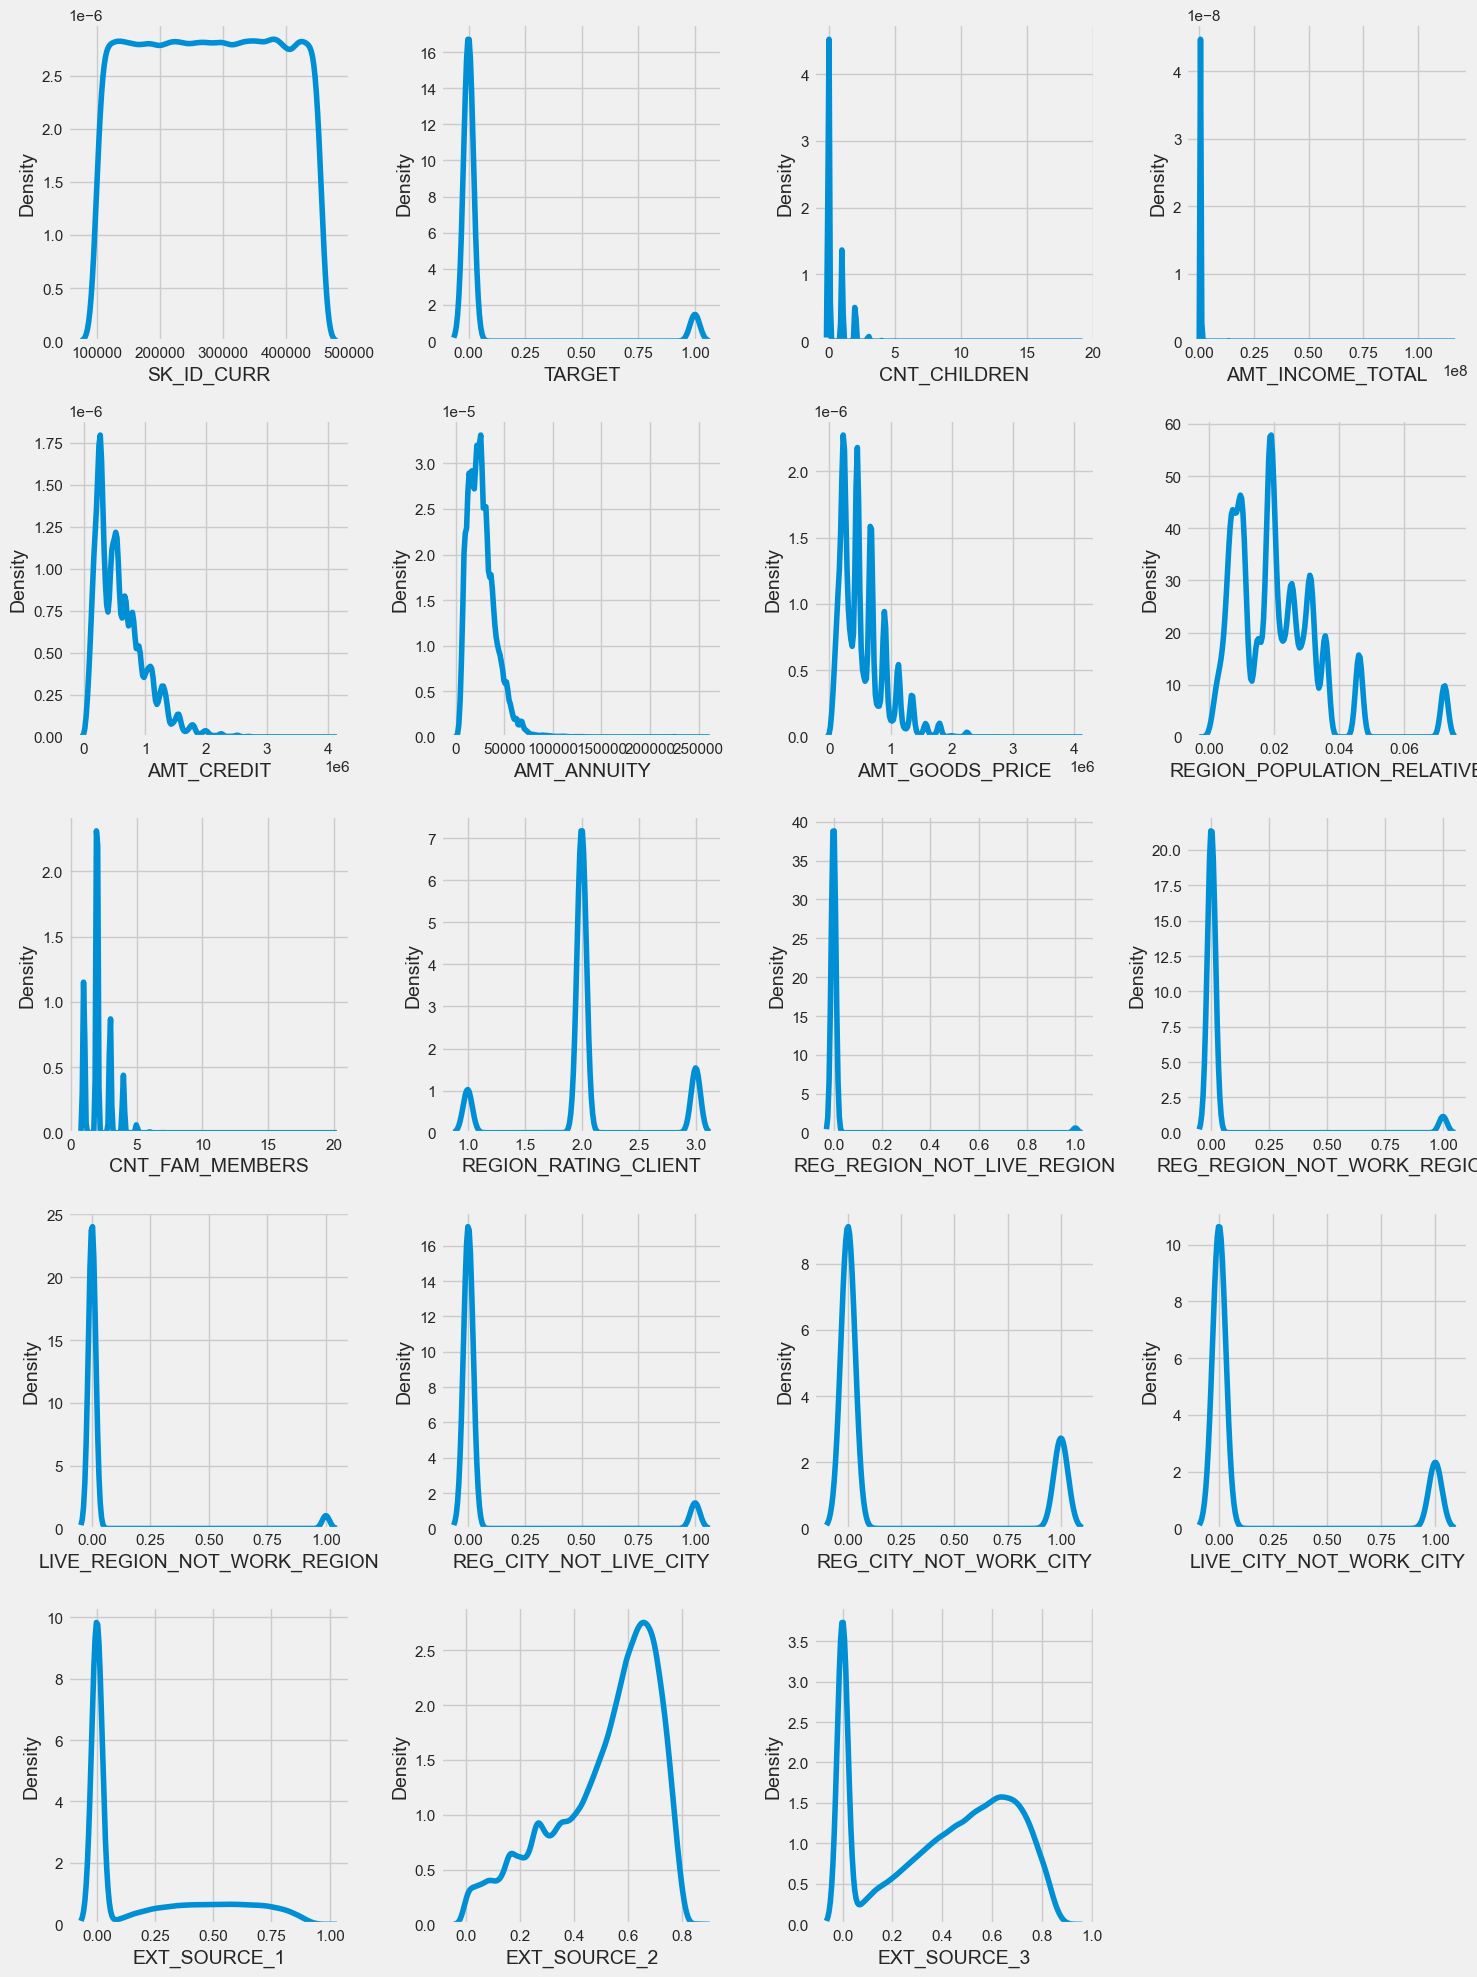

In [21]:
plt.figure(figsize= (15, 20))
for i in range(len(nums)):
    plt.subplot(5, 4, i+1)
    sns.kdeplot(x = dataframe_train_eda_clean[nums[i]])
    plt.tight_layout()

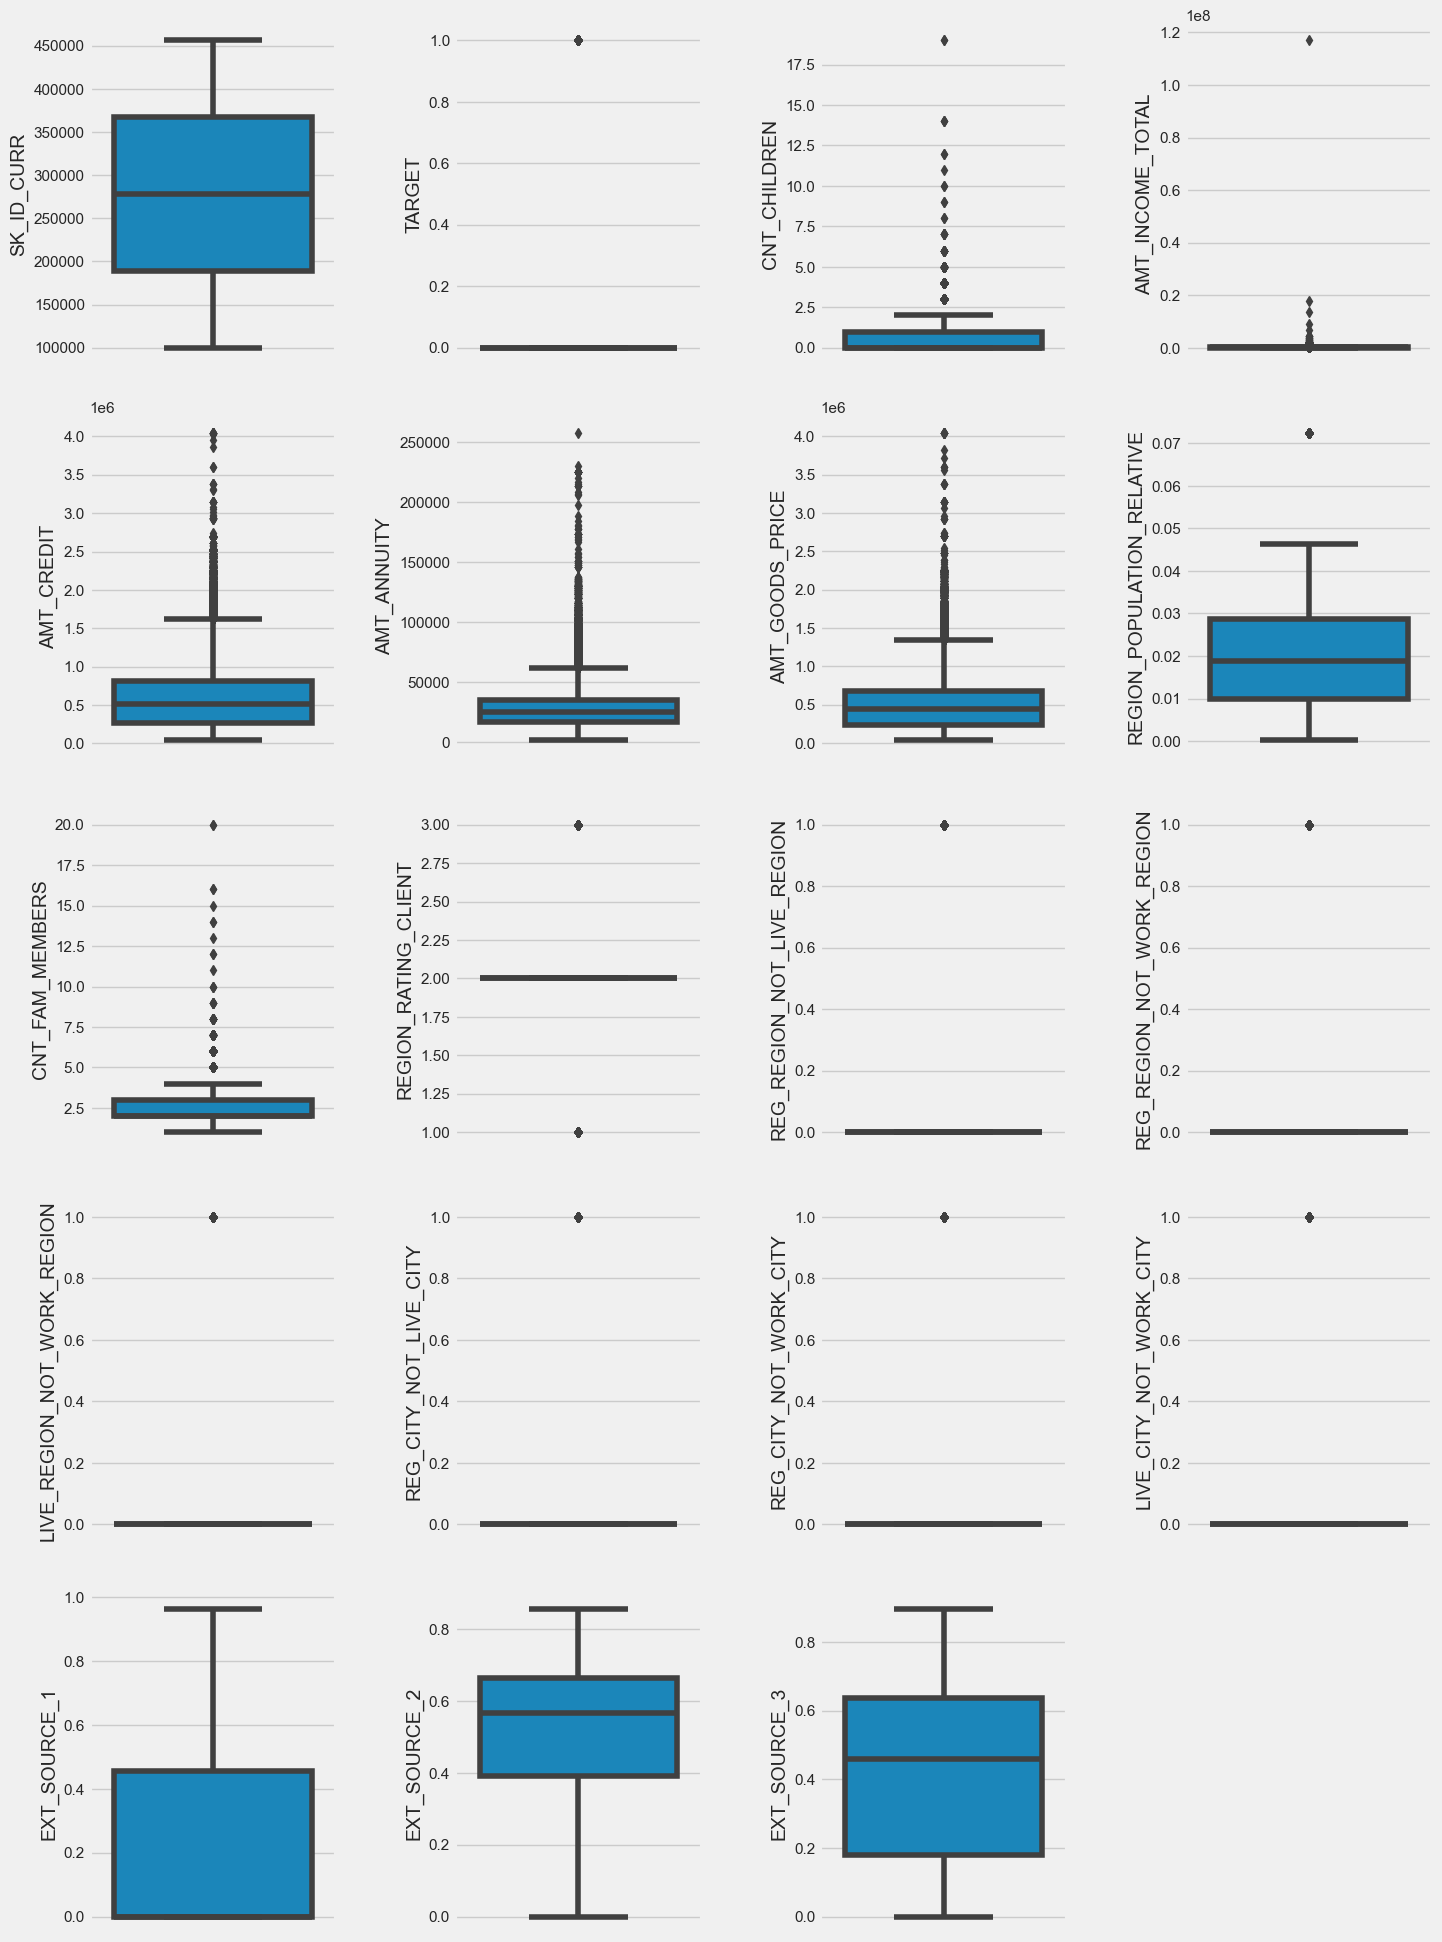

In [22]:
plt.figure(figsize= (15, 20))
for i in range(len(nums)):
    plt.subplot(5, 4, i+1)
    sns.boxplot(y = dataframe_train_eda_clean[nums[i]], orient= 'v')
    plt.tight_layout(pad=2)

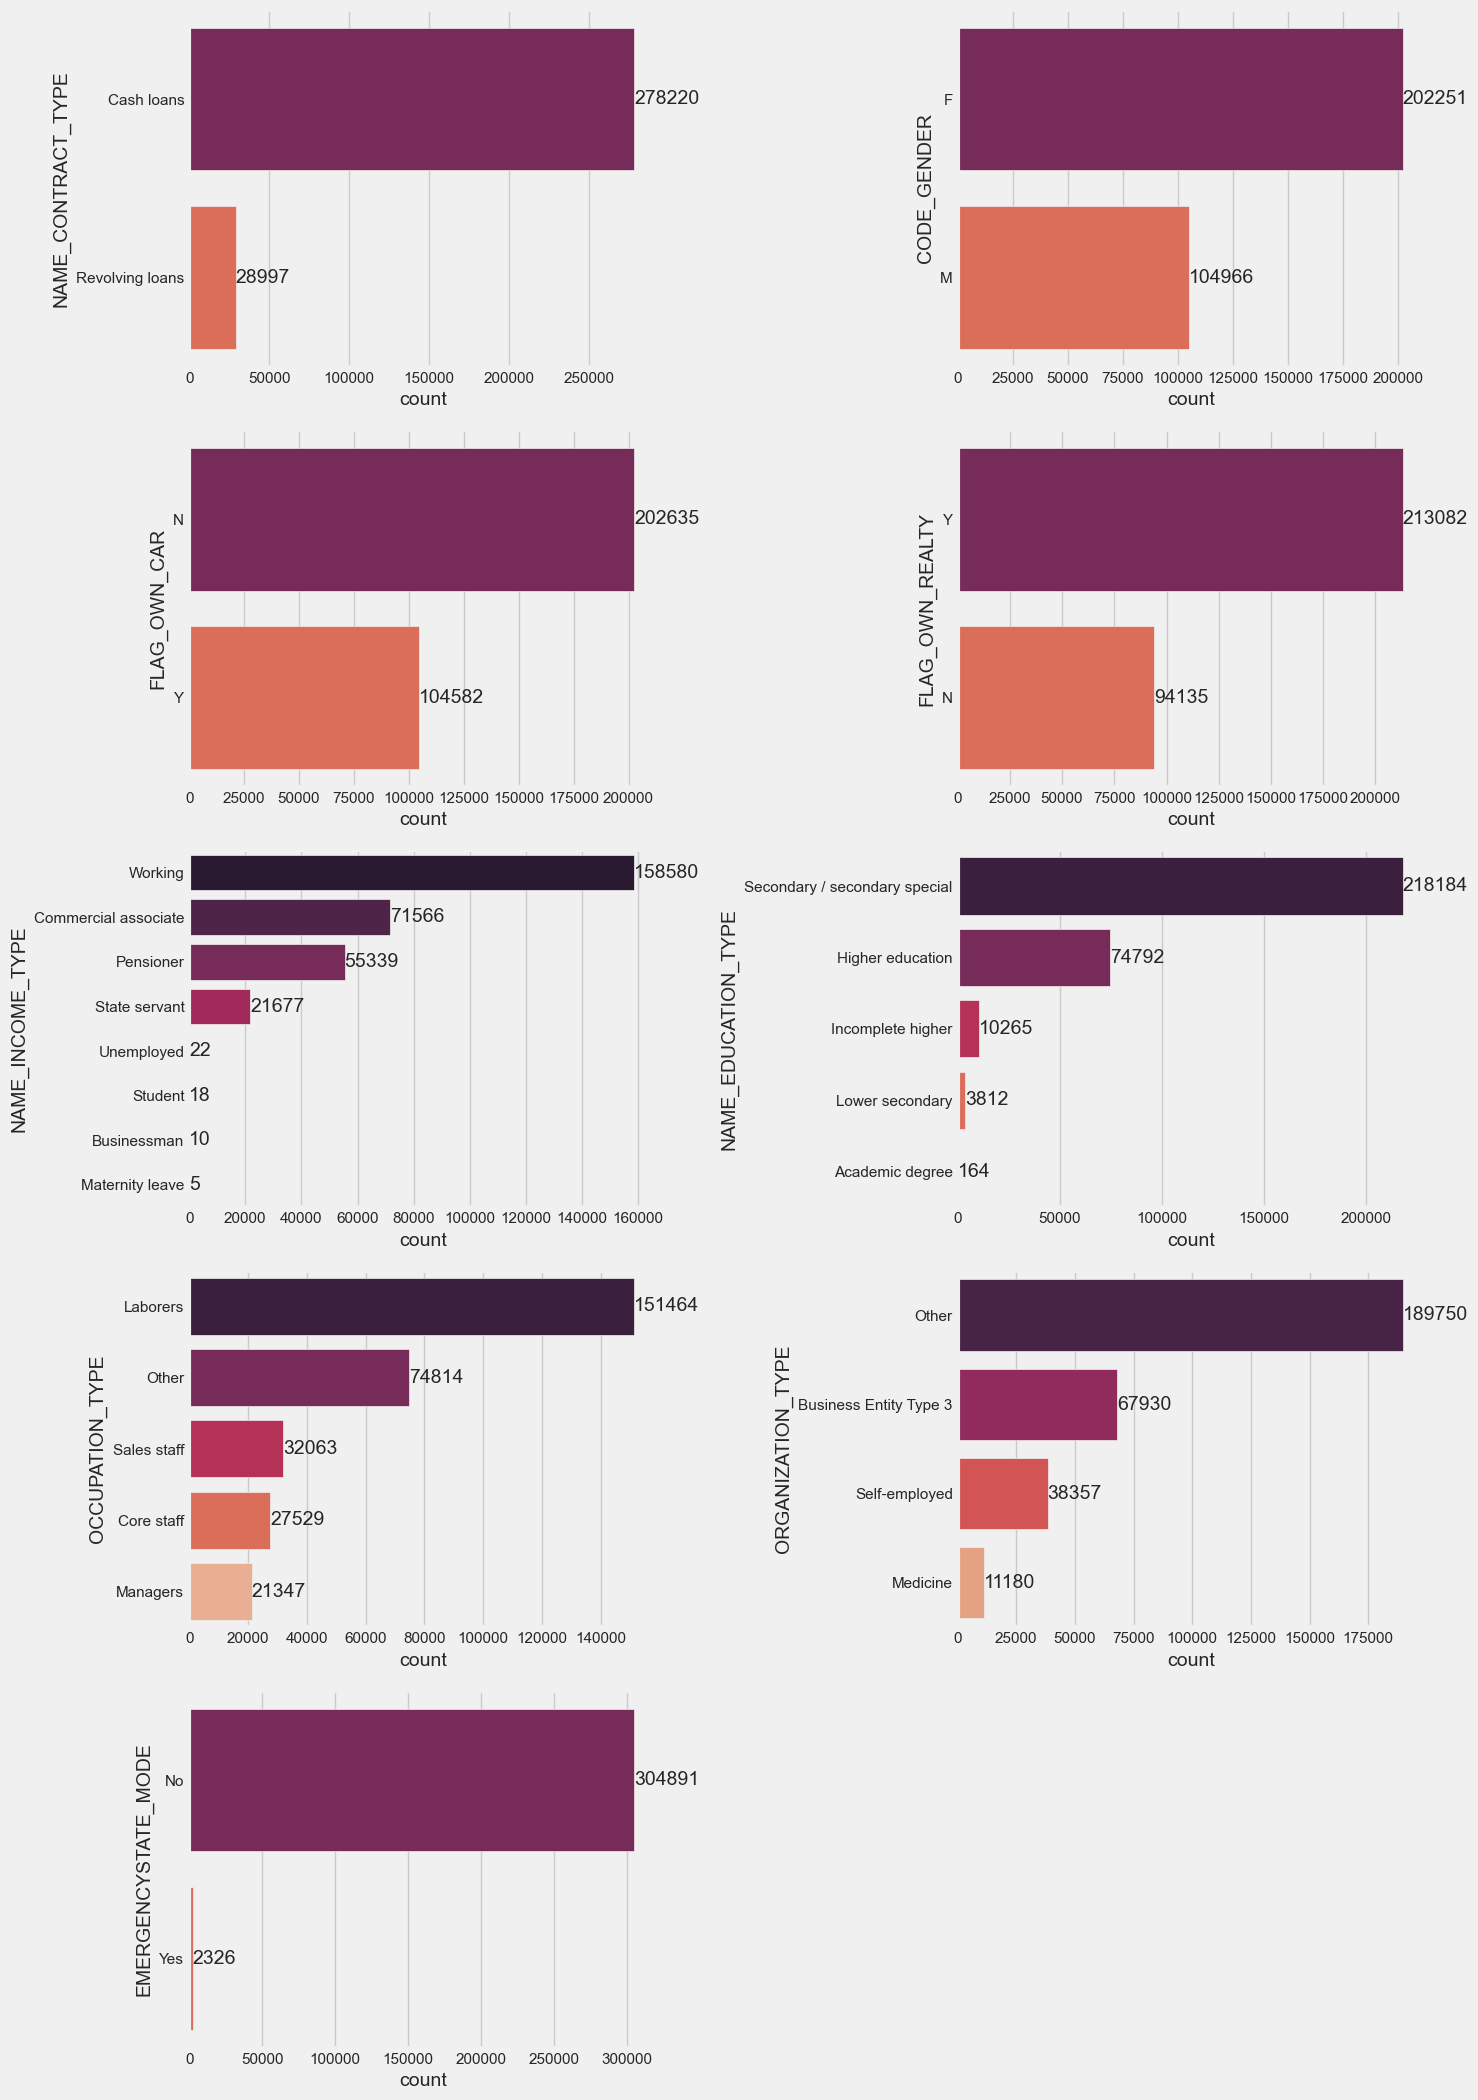

In [23]:
plt.figure(figsize=(15, 25))
for i in range(len(cats)):
    plt.subplot(6, 2, i+1)
    ax = sns.countplot(y=cats[i], data=dataframe_train_eda_clean, palette='rocket', order=dataframe_train_eda_clean[cats[i]].value_counts().index)
    plt.bar_label(ax.containers[0])
    plt.tight_layout()

**Multivariate Analysis**

---

<Axes: >

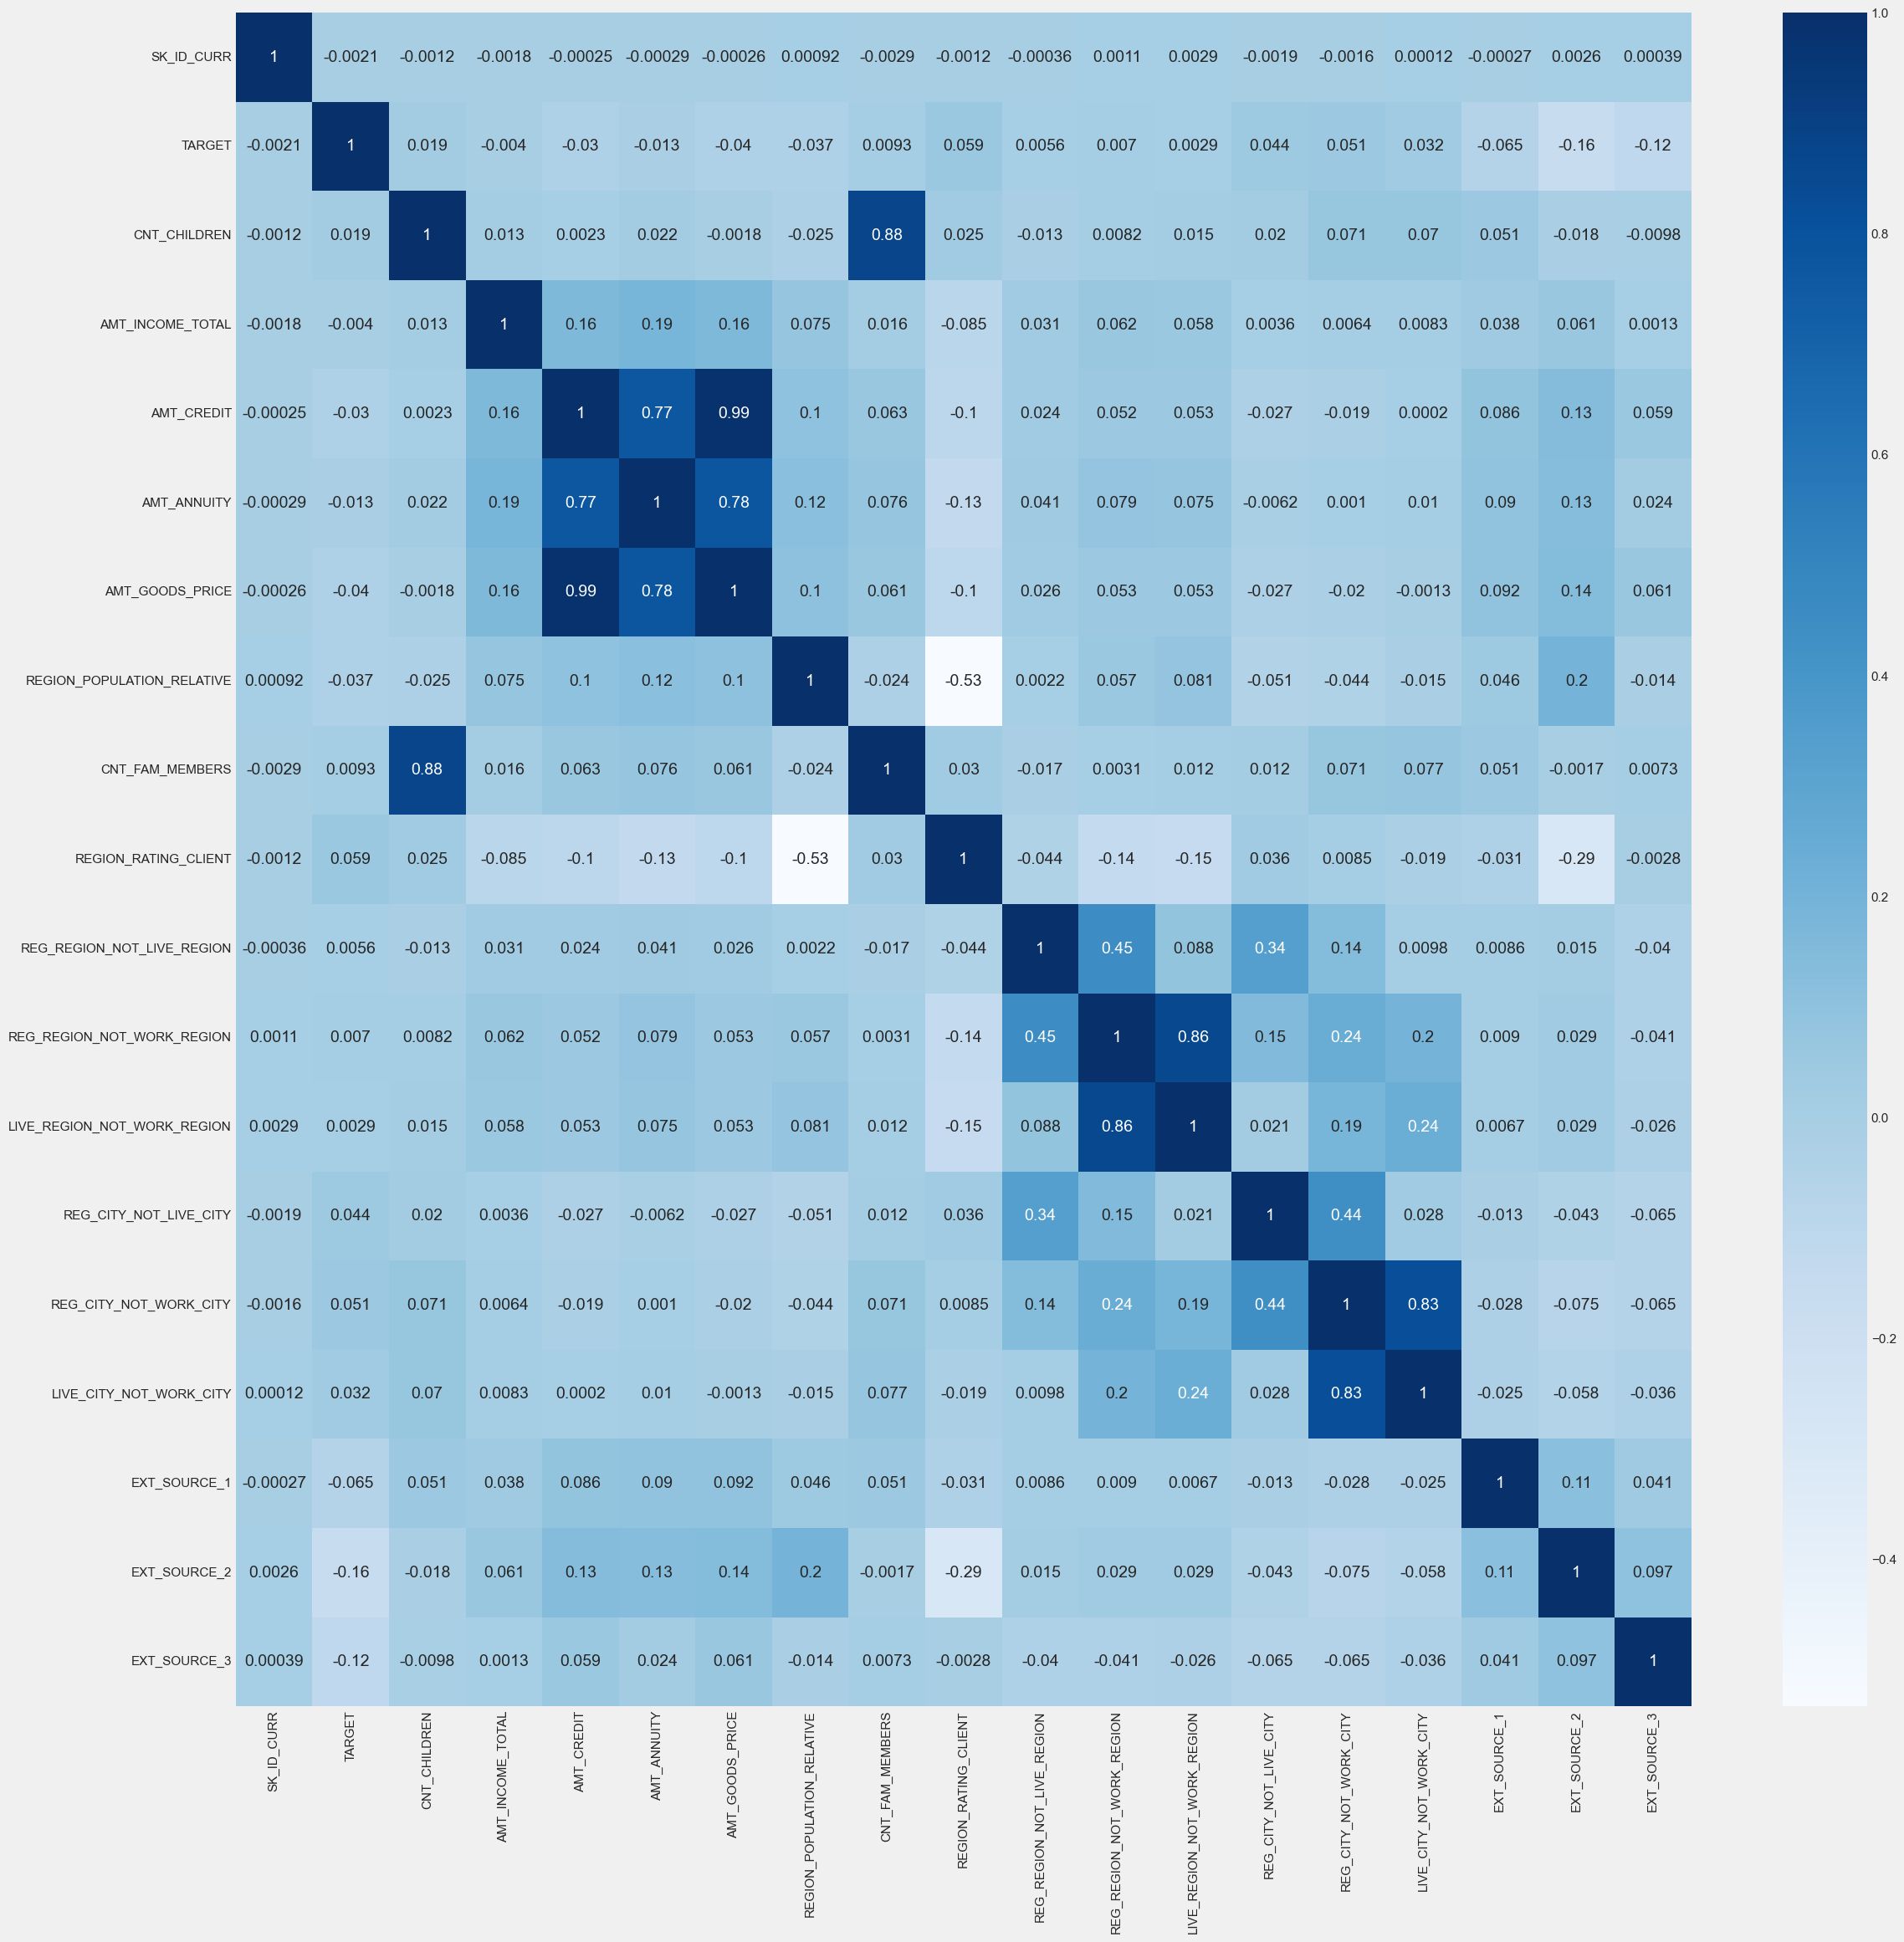

In [24]:
plt.figure(figsize=(25, 25))
sns.heatmap(dataframe_train_eda_clean[nums].corr(), annot=True, cmap='Blues')

## **Feature Engineering**

---

In [25]:
dataframe_train_fe_clean = dataframe_train_eda_clean.copy()

**Handling Outliers**

---

In [26]:
right_skew = ['CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','CNT_FAM_MEMBERS',
              'REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY',
              'REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY','EXT_SOURCE_1','EXT_SOURCE_3']

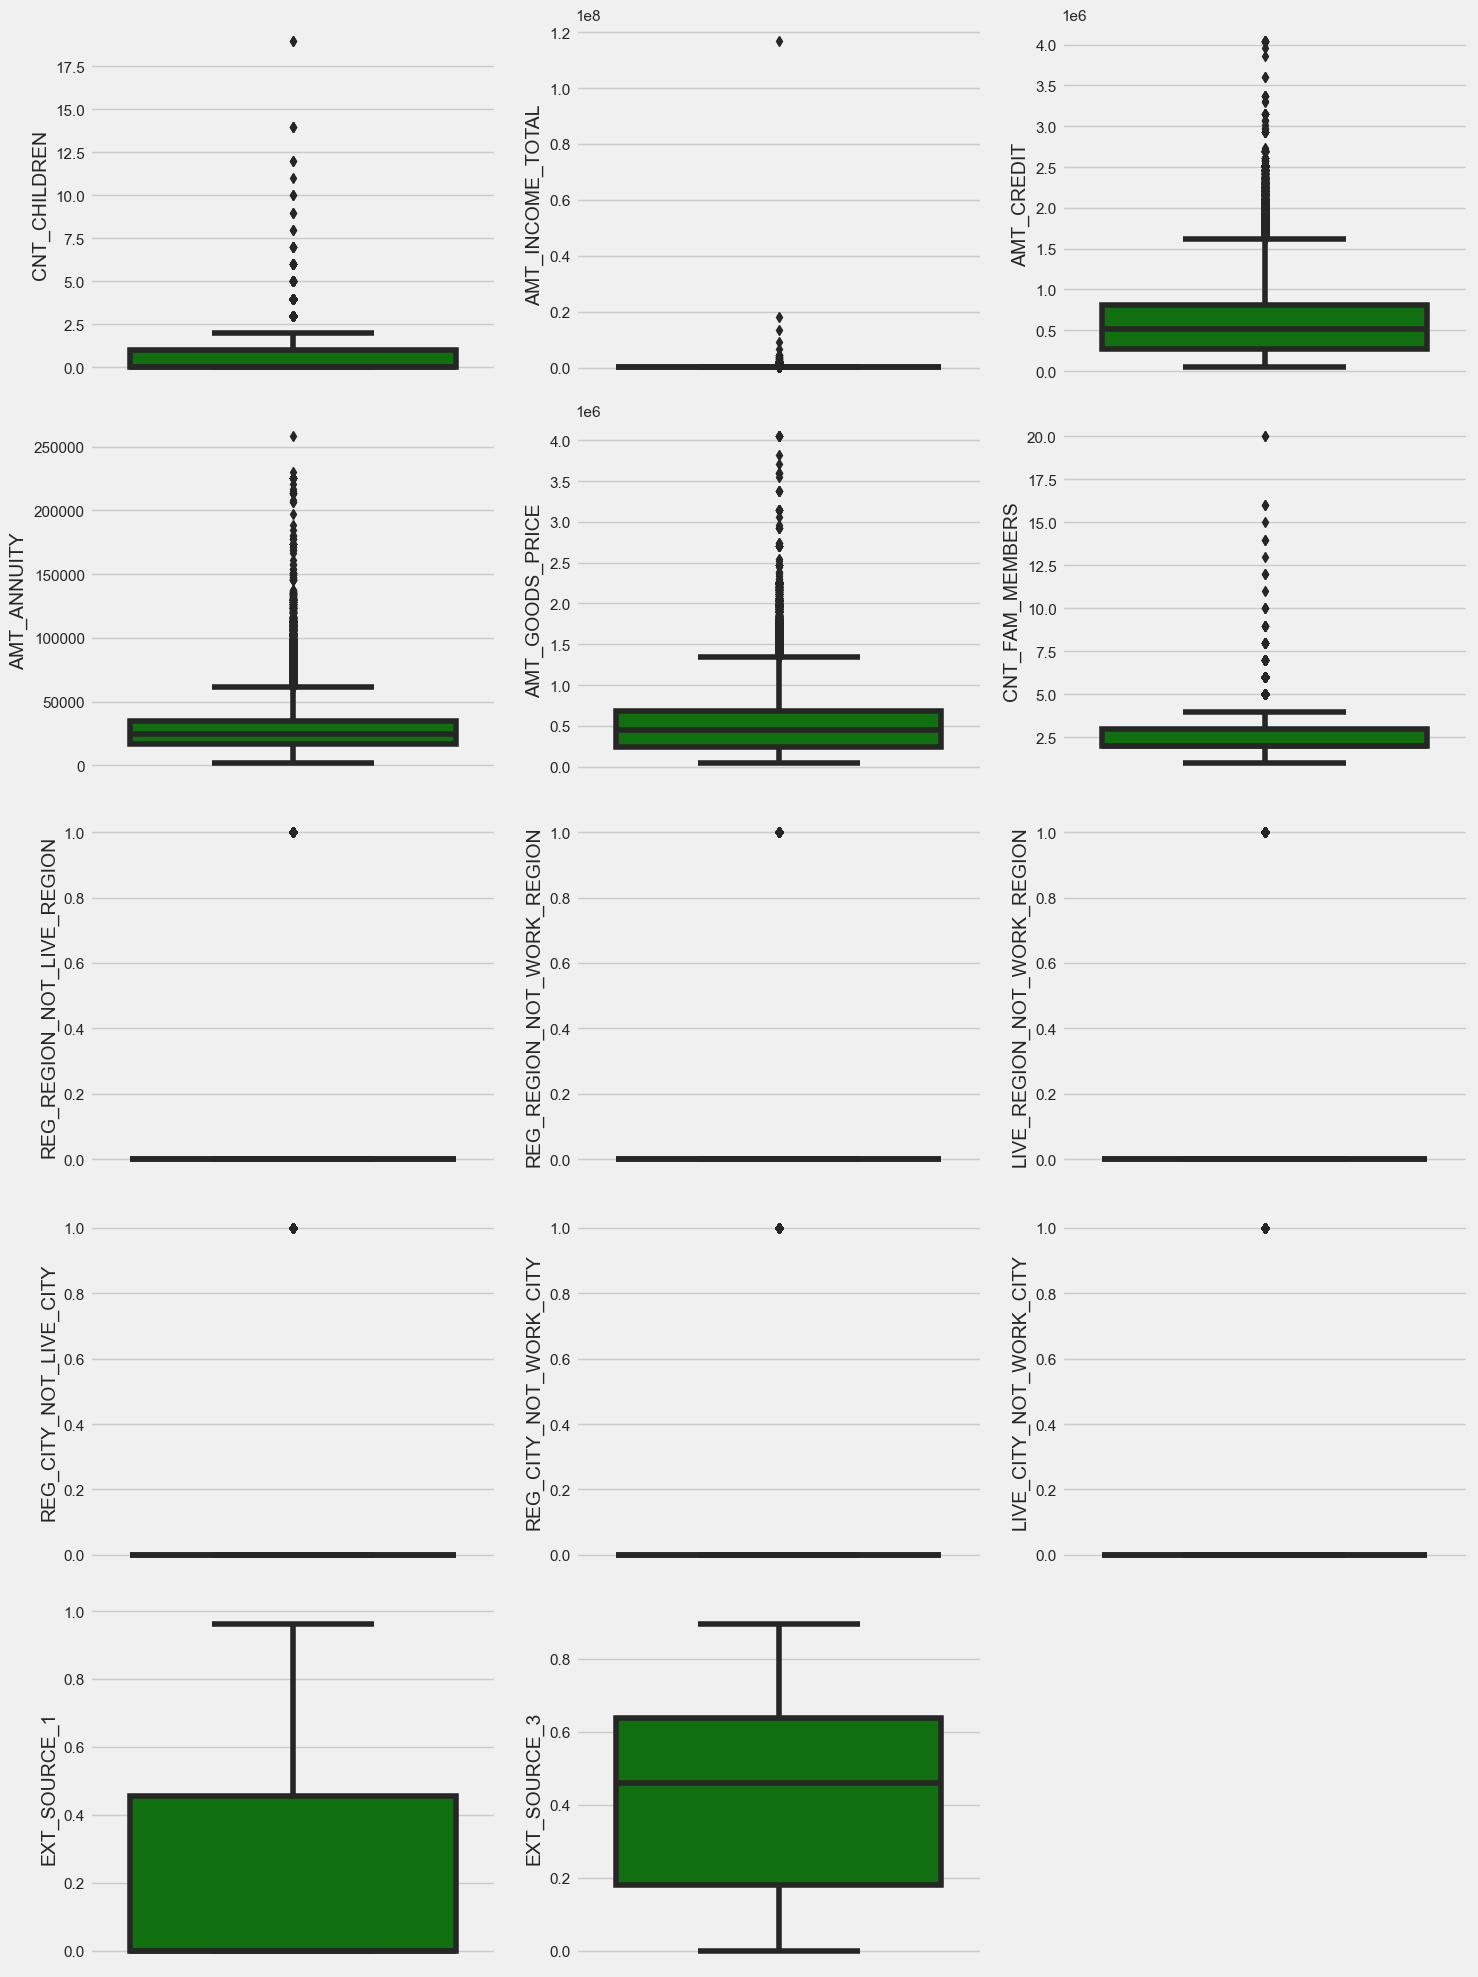

In [27]:
plt.figure(figsize= (15, 20))
for i in range(len(right_skew)):
    plt.subplot(5, 3, i+1)
    sns.boxplot(y=dataframe_train_fe_clean[right_skew[i]], color='green',orient='v')
    plt.tight_layout()

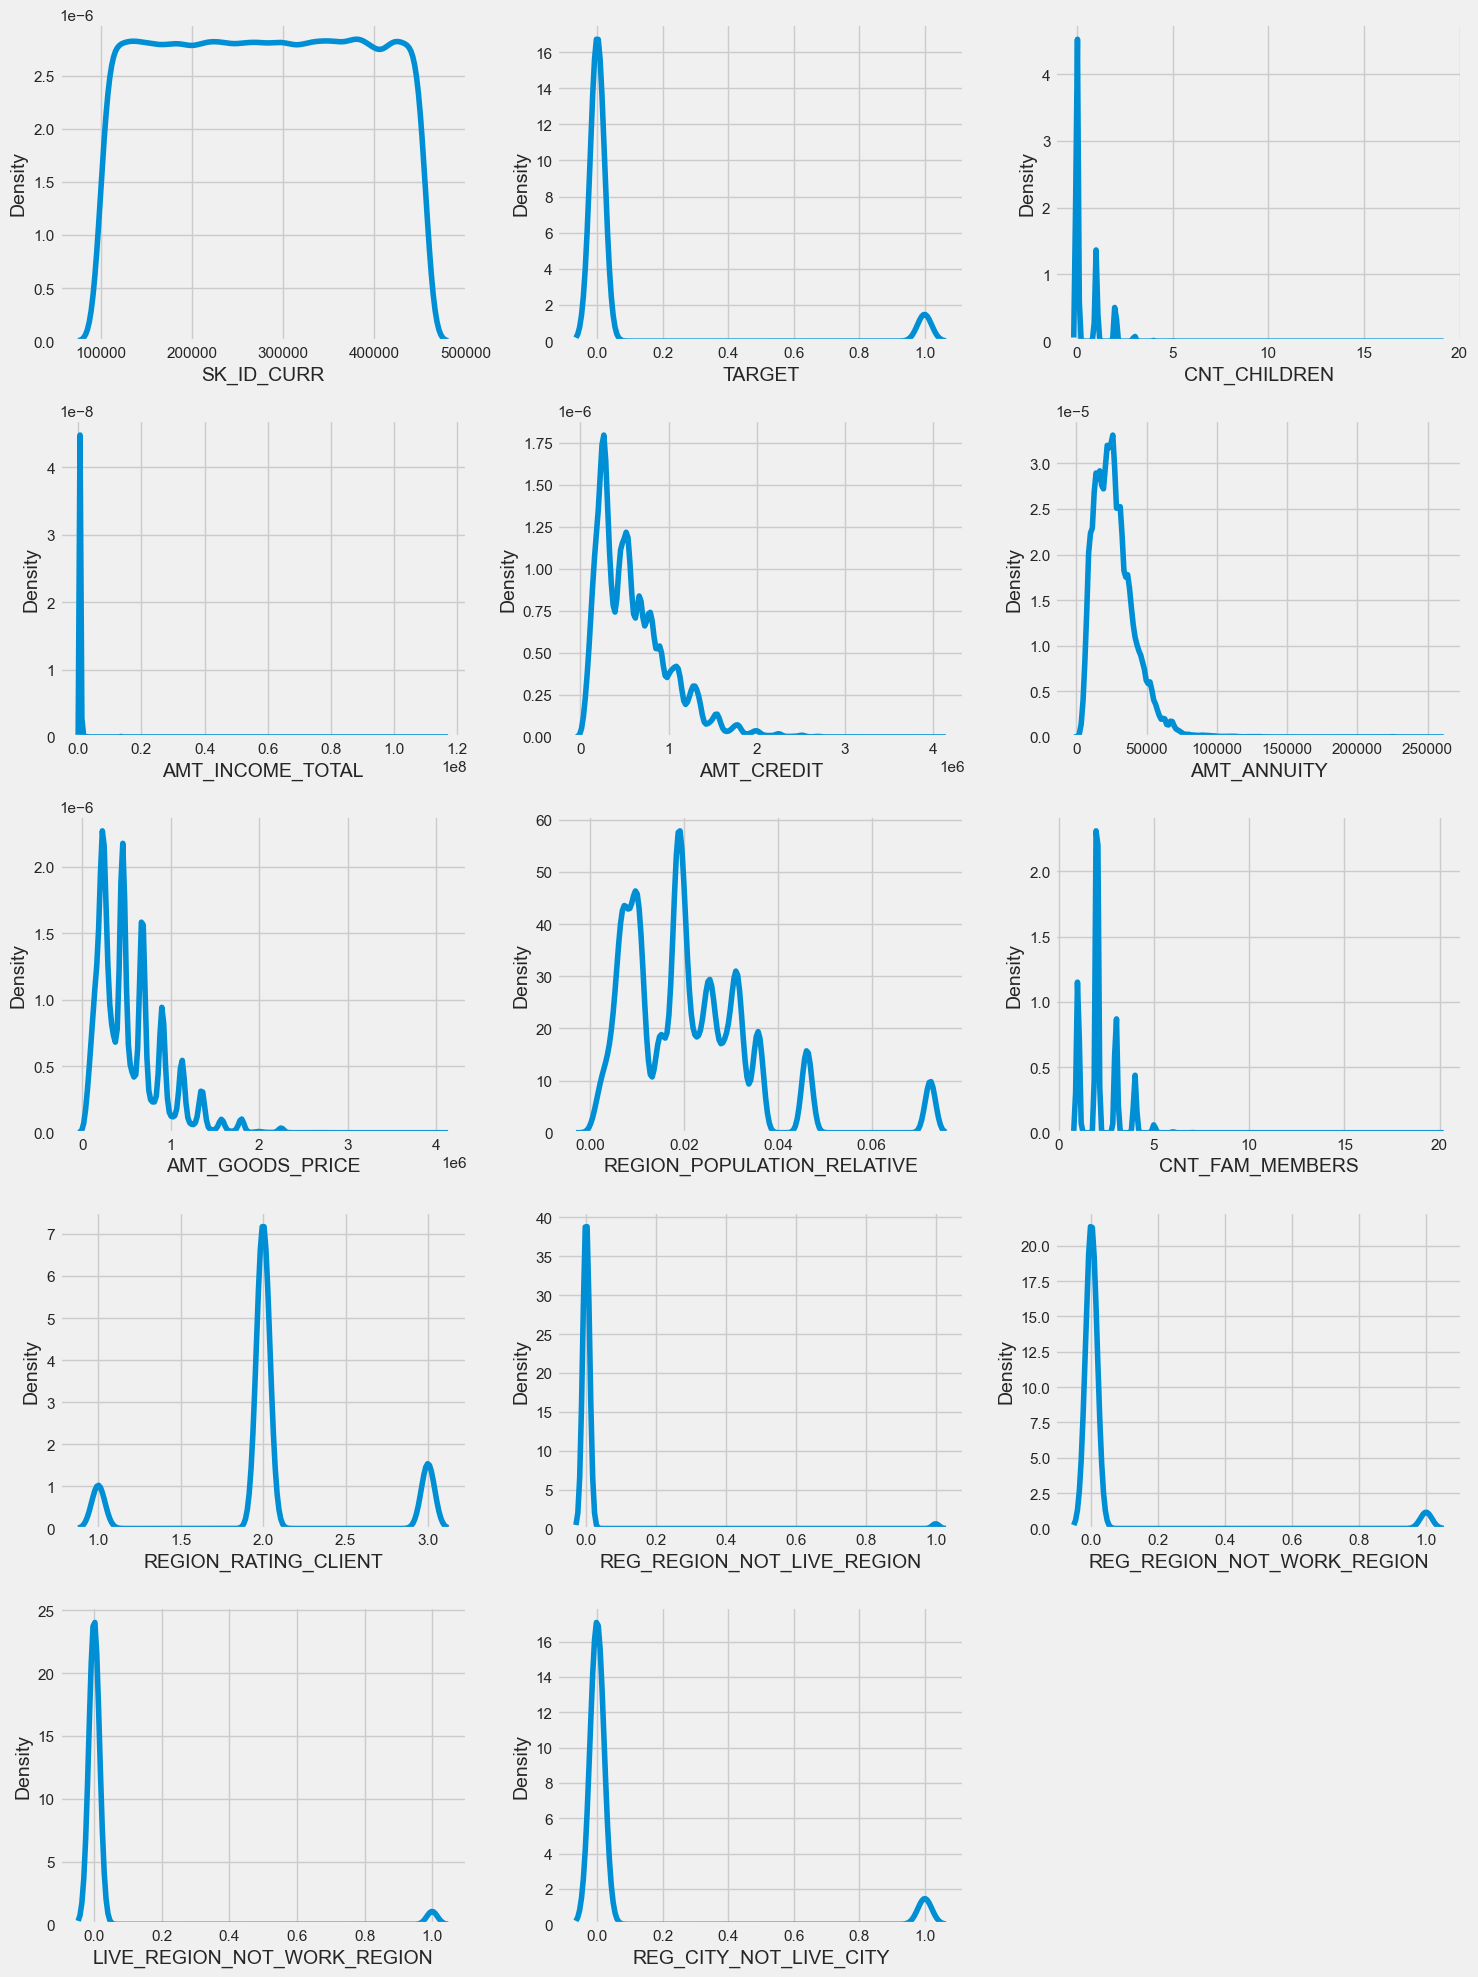

In [28]:
plt.figure(figsize= (15, 20))
for i in range(len(right_skew)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x = dataframe_train_fe_clean[nums[i]])
    plt.tight_layout()

In [29]:
for nums in right_skew:
    dataframe_train_fe_clean['log_'+nums] = np.log(dataframe_train_fe_clean[nums] + (dataframe_train_fe_clean[dataframe_train_fe_clean[nums] > 0][nums].min() / 2))

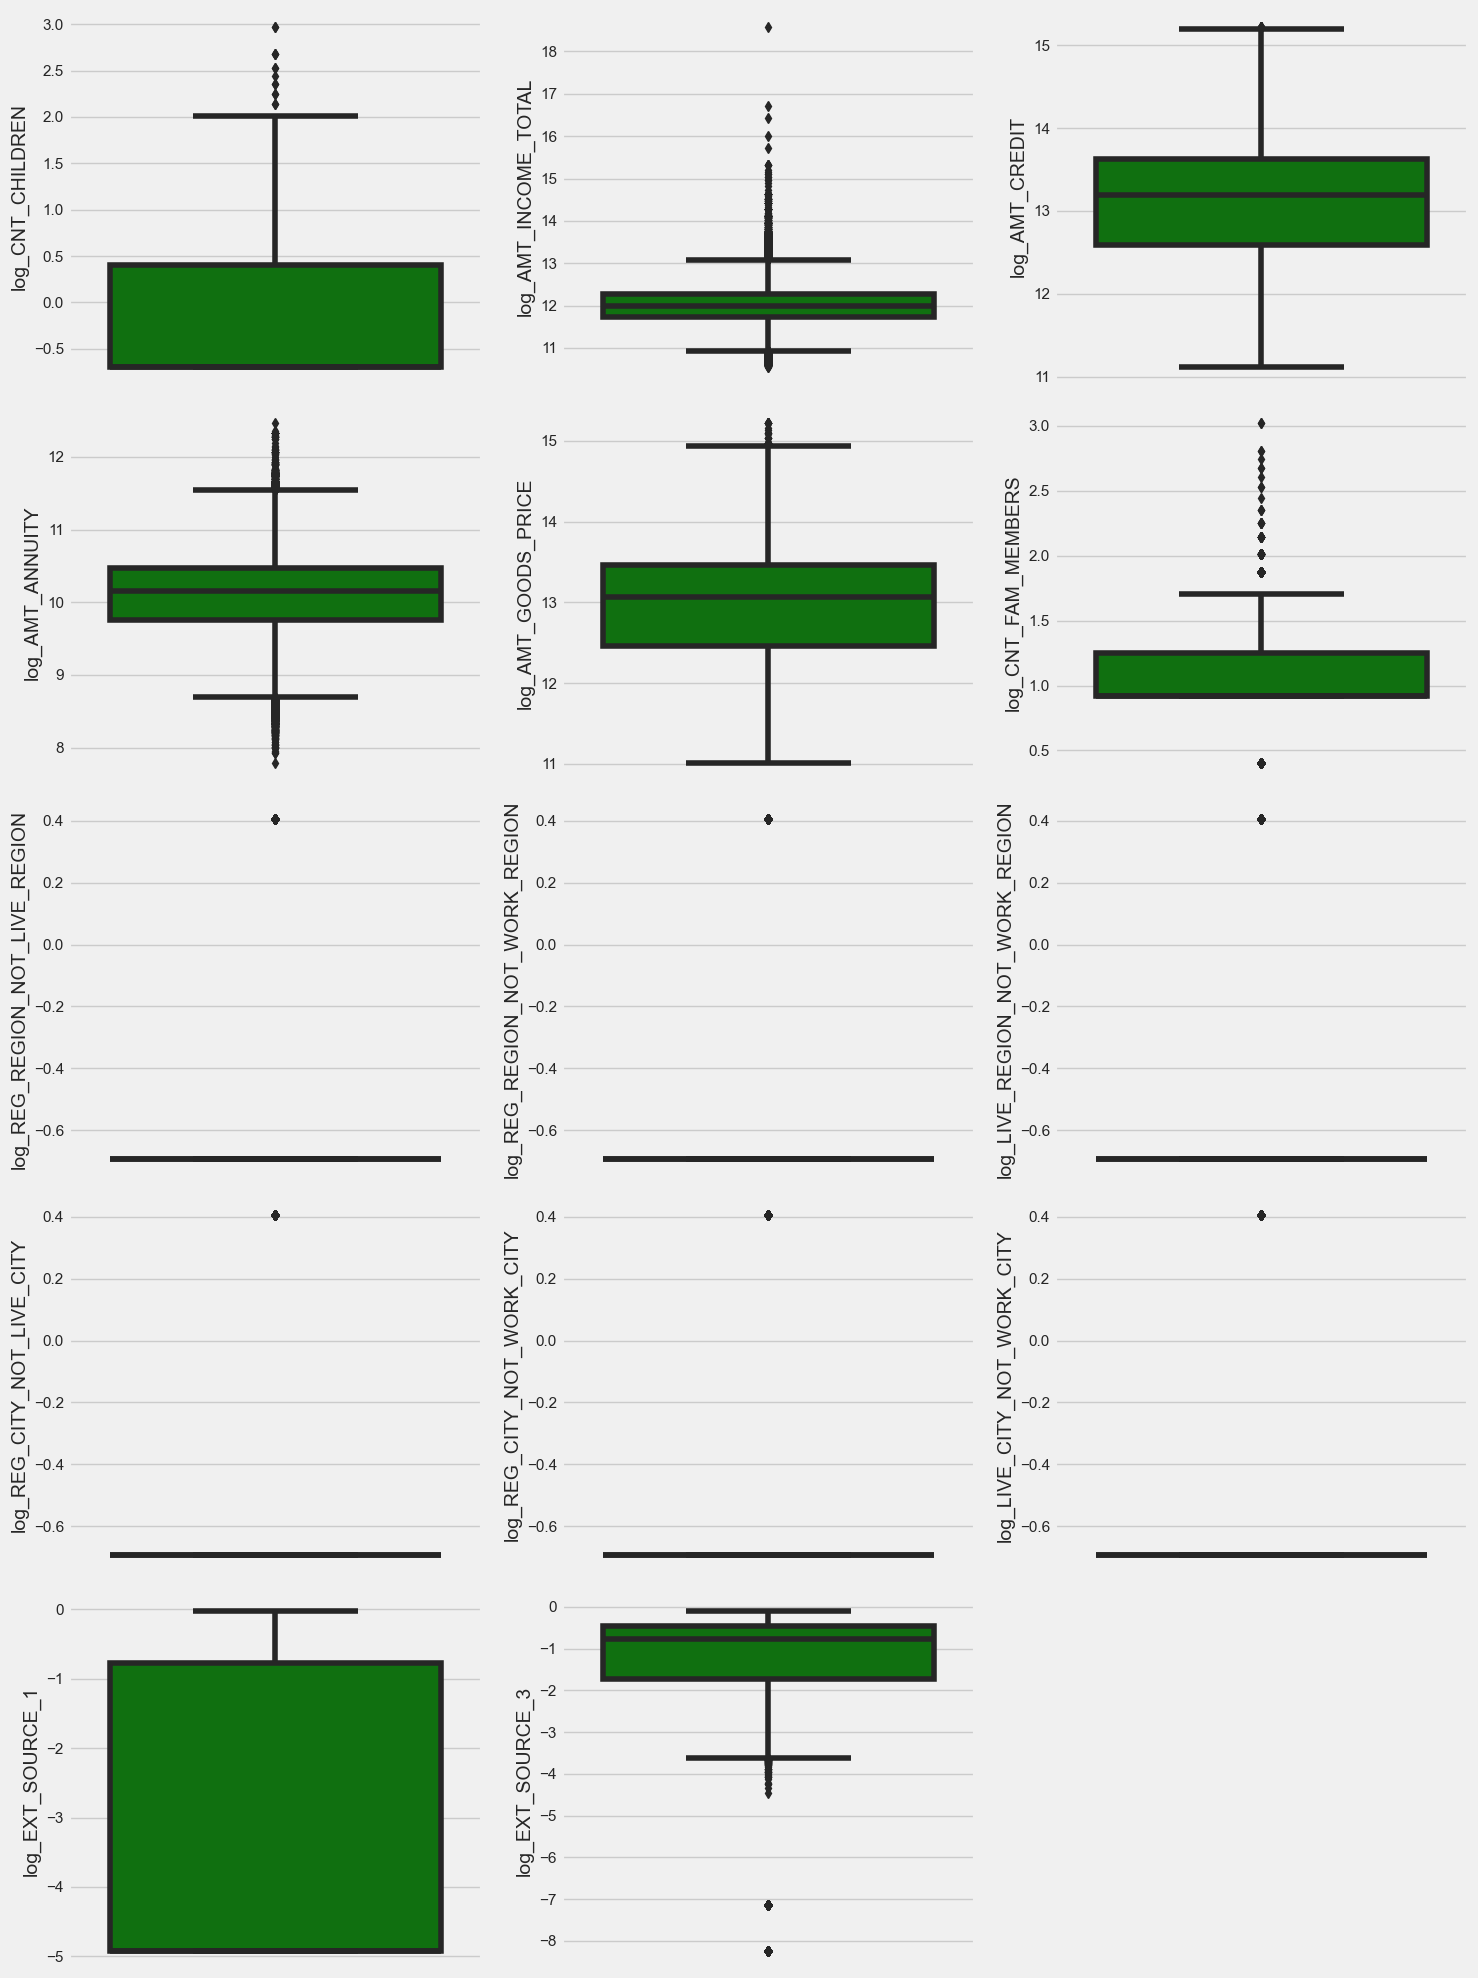

In [30]:
right_skew = ['log_CNT_CHILDREN','log_AMT_INCOME_TOTAL','log_AMT_CREDIT','log_AMT_ANNUITY','log_AMT_GOODS_PRICE','log_CNT_FAM_MEMBERS',
              'log_REG_REGION_NOT_LIVE_REGION','log_REG_REGION_NOT_WORK_REGION','log_LIVE_REGION_NOT_WORK_REGION','log_REG_CITY_NOT_LIVE_CITY',
              'log_REG_CITY_NOT_WORK_CITY','log_LIVE_CITY_NOT_WORK_CITY','log_EXT_SOURCE_1','log_EXT_SOURCE_3']

plt.figure(figsize= (15, 20))
for i in range(len(right_skew)):
    plt.subplot(5, 3, i+1)
    sns.boxplot(y=dataframe_train_fe_clean[right_skew[i]], color='green',orient='v')
    plt.tight_layout()

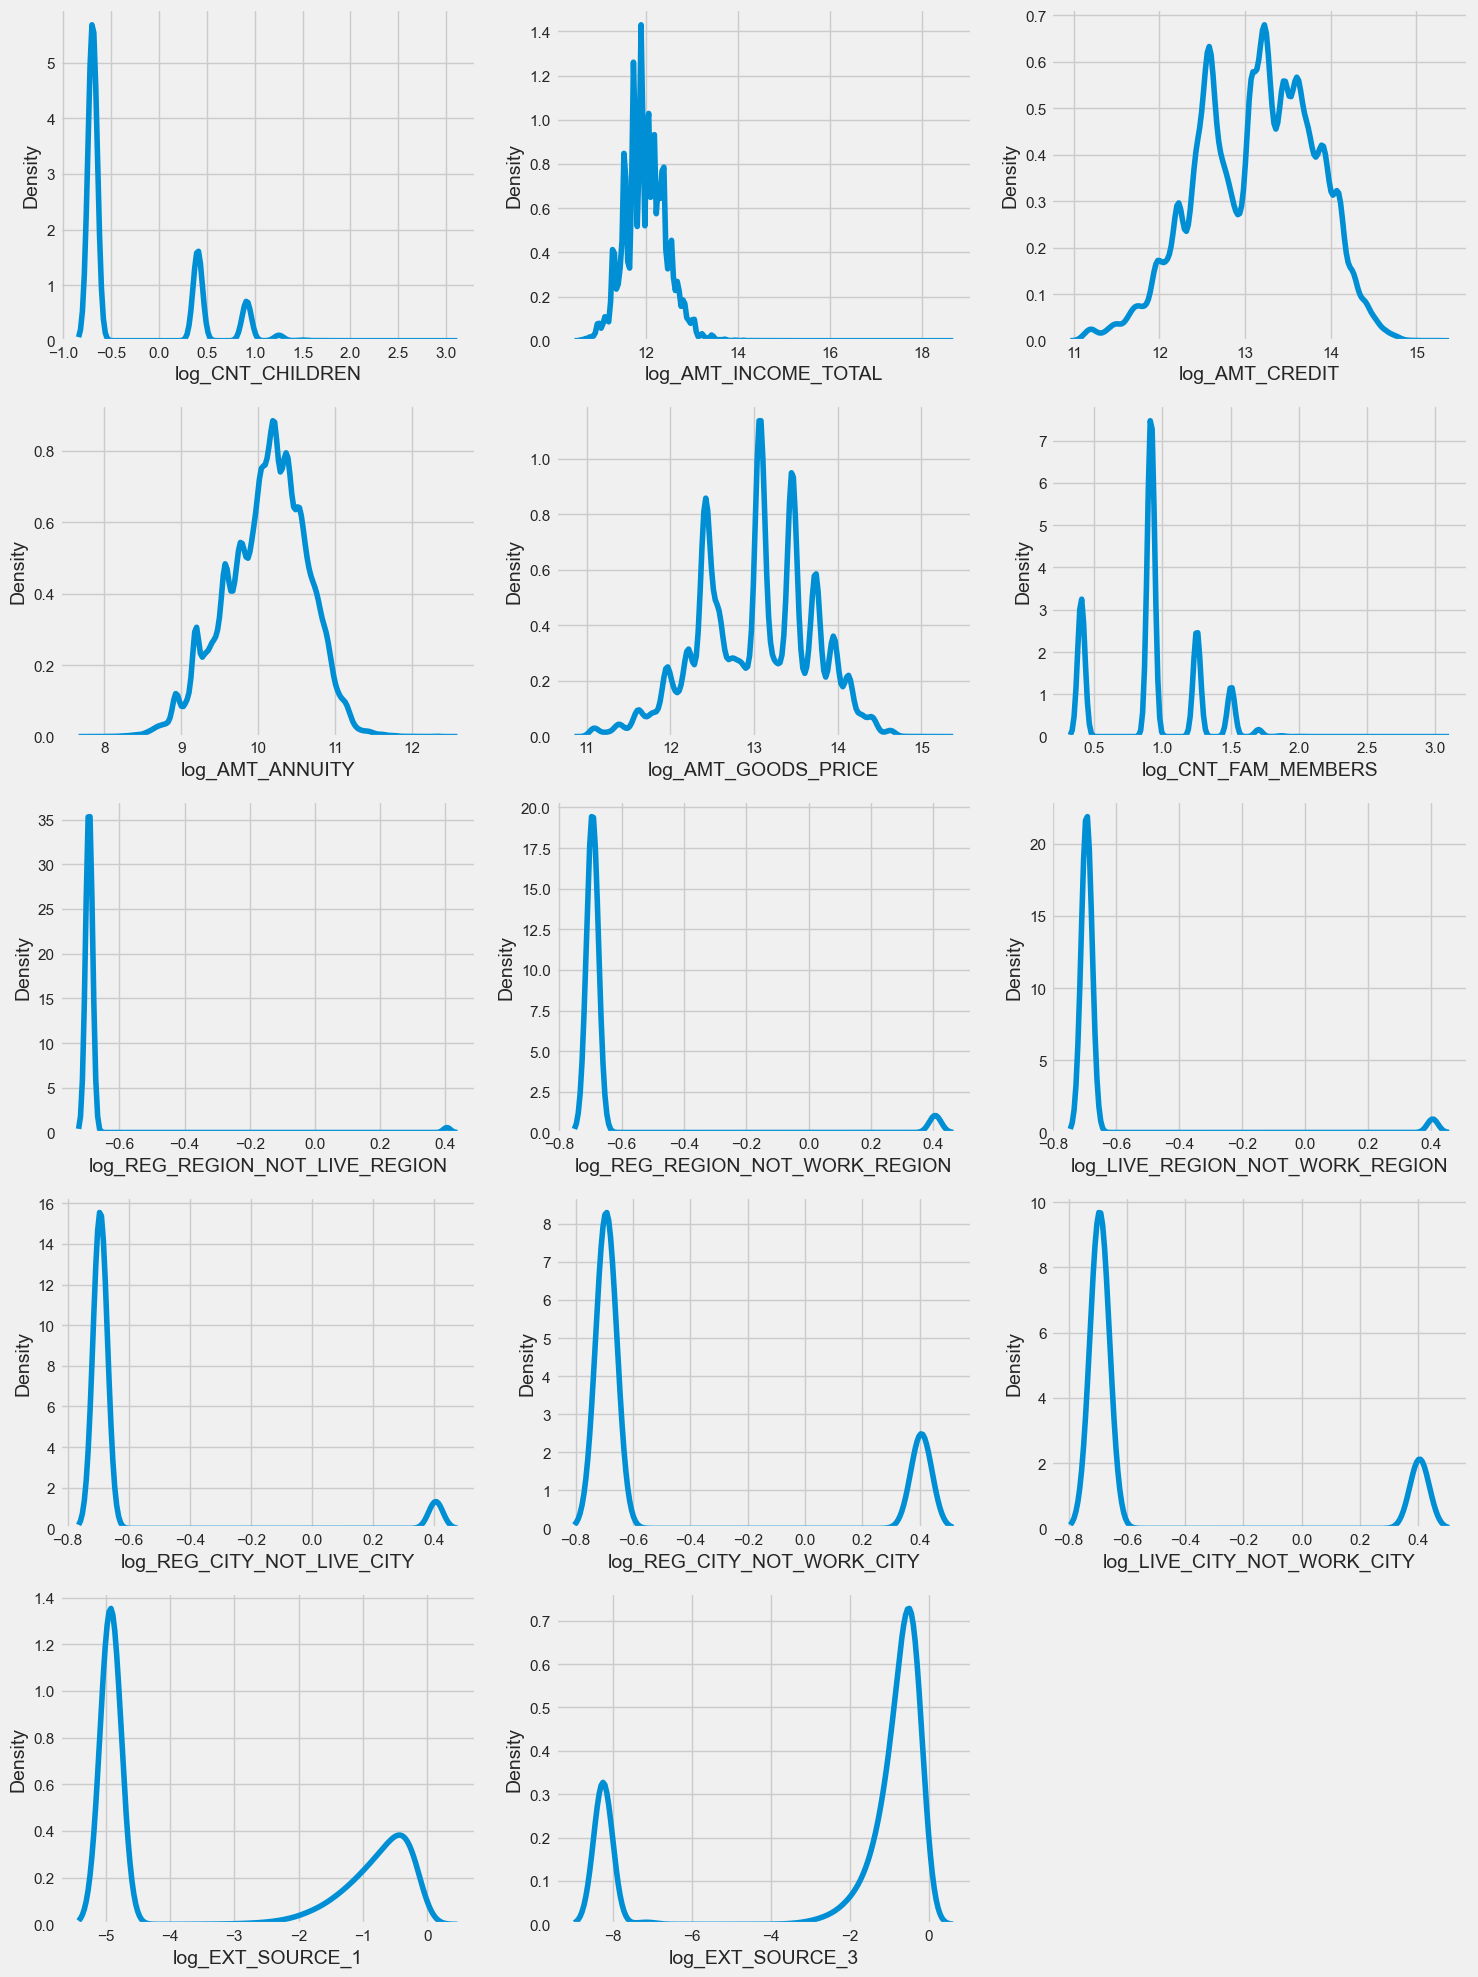

In [31]:
plt.figure(figsize= (15, 20))
for i in range(len(right_skew)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x = dataframe_train_fe_clean[right_skew[i]])
    plt.tight_layout()

In [32]:
dataframe_train_fe_clean.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,log_AMT_GOODS_PRICE,log_CNT_FAM_MEMBERS,log_REG_REGION_NOT_LIVE_REGION,log_REG_REGION_NOT_WORK_REGION,log_LIVE_REGION_NOT_WORK_REGION,log_REG_CITY_NOT_LIVE_CITY,log_REG_CITY_NOT_WORK_CITY,log_LIVE_CITY_NOT_WORK_CITY,log_EXT_SOURCE_1,log_EXT_SOURCE_3
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,12.824631,0.405465,-0.693147,-0.693147,-0.693147,-0.693147,-0.693147,-0.693147,-2.404385,-1.968692
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,13.955055,0.916291,-0.693147,-0.693147,-0.693147,-0.693147,-0.693147,-0.693147,-1.143972,-8.240954
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,11.952792,0.405465,-0.693147,-0.693147,-0.693147,-0.693147,-0.693147,-0.693147,-4.922066,-0.314943
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,12.667445,0.916291,-0.693147,-0.693147,-0.693147,-0.693147,-0.693147,-0.693147,-4.922066,-8.240954
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,13.186746,0.405465,-0.693147,-0.693147,-0.693147,-0.693147,0.405465,0.405465,-4.922066,-8.240954


In [33]:
dataframe_train_fe_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307217 entries, 0 to 307510
Data columns (total 42 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   SK_ID_CURR                       307217 non-null  int64  
 1   TARGET                           307217 non-null  int64  
 2   NAME_CONTRACT_TYPE               307217 non-null  object 
 3   CODE_GENDER                      307217 non-null  object 
 4   FLAG_OWN_CAR                     307217 non-null  object 
 5   FLAG_OWN_REALTY                  307217 non-null  object 
 6   CNT_CHILDREN                     307217 non-null  int64  
 7   AMT_INCOME_TOTAL                 307217 non-null  float64
 8   AMT_CREDIT                       307217 non-null  float64
 9   AMT_ANNUITY                      307217 non-null  float64
 10  AMT_GOODS_PRICE                  307217 non-null  float64
 11  NAME_INCOME_TYPE                 307217 non-null  object 
 12  NA

In [34]:
dataframe_train_fe_clean['ORGANIZATION_TYPE'].value_counts()

Other                     189750
Business Entity Type 3     67930
Self-employed              38357
Medicine                   11180
Name: ORGANIZATION_TYPE, dtype: int64

**Feature Encoding**

---

In [35]:
for cats in ['NAME_CONTRACT_TYPE']:
  onehots = pd.get_dummies(dataframe_train_fe_clean[cats], prefix=cats)
  dataframe_train_fe_clean = dataframe_train_fe_clean.join(onehots)

In [36]:
mapping_grade = {
    'Lower secondary' : 1,
    'Secondary / secondary special' : 2,
    'Incomplete higher' : 3,
    'Higher education' : 4,
    'Academic degree' : 5}

dataframe_train_fe_clean['NAME_EDUCATION_TYPE'] = dataframe_train_fe_clean['NAME_EDUCATION_TYPE'].map(mapping_grade)

In [37]:
dataframe_train_fe_clean['NAME_INCOME_TYPE'] = dataframe_train_fe_clean['NAME_INCOME_TYPE'].astype('category').cat.codes
dataframe_train_fe_clean['CODE_GENDER'] = dataframe_train_fe_clean['CODE_GENDER'].astype('category').cat.codes
dataframe_train_fe_clean['FLAG_OWN_CAR'] = dataframe_train_fe_clean['FLAG_OWN_CAR'].astype('category').cat.codes
dataframe_train_fe_clean['FLAG_OWN_REALTY'] = dataframe_train_fe_clean['FLAG_OWN_REALTY'].astype('category').cat.codes
dataframe_train_fe_clean['EMERGENCYSTATE_MODE'] = dataframe_train_fe_clean['EMERGENCYSTATE_MODE'].astype('category').cat.codes

# **Modeling**

---

In [38]:
dataframe_train_model = dataframe_train_fe_clean.copy()

In [39]:
dataframe_model_split = dataframe_train_model.drop(columns=['NAME_CONTRACT_TYPE','ORGANIZATION_TYPE','OCCUPATION_TYPE','CNT_CHILDREN',
                                                            'AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','CNT_FAM_MEMBERS',
                                                            'EXT_SOURCE_1','EXT_SOURCE_3','REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION',
                                                            'LIVE_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY',
                                                            'LIVE_CITY_NOT_WORK_CITY','REGION_RATING_CLIENT']).copy() 

In [40]:
dataframe_model_split['TARGET'].value_counts()

0    282413
1     24804
Name: TARGET, dtype: int64

In [41]:
from sklearn.model_selection import train_test_split

# Pisahkan fitur dan target
X = dataframe_model_split.drop(columns=['TARGET'])
y = dataframe_model_split['TARGET']

# Bagi data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,roc_curve,confusion_matrix, fbeta_score, make_scorer
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier

def eval_classification(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)

    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Accuracy (Train Set): %.2f" % accuracy_score(y_train, y_pred_train))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Precision (Train Set): %.2f" % precision_score(y_train, y_pred_train))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("Recall (Train Set): %.2f" % recall_score(y_train, y_pred_train))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    print("F1-Score (Train Set): %.2f" % f1_score(y_train, y_pred_train))

    print("roc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("roc_auc (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))
    #1
    score = cross_validate(RandomForestClassifier(), X, y, cv=5, scoring='roc_auc', return_train_score=True)
    print('roc_auc (crossval train): '+ str(score['train_score'].mean()))
    print('roc_auc (crossval test): '+ str(score['test_score'].mean()))

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

In [43]:
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

def draw_learning_curve(param_values):
    train_scores = []
    test_scores = []

    for c in param_values:
        model = LogisticRegression(penalty='l2', C=c)
        model.fit(X_train, y_train)

        # eval on train
        y_pred_train_proba = model.predict_proba(X_train)
        train_auc = roc_auc_score(y_train, y_pred_train_proba[:,1])
        train_scores.append(train_auc)

        # eval on test
        y_pred_proba = model.predict_proba(X_test)
        test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
        test_scores.append(test_auc)

        print('param value: ' + str(c) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('C')
    plt.ylabel('AUC')
    plt.title('Learning Curve - Hyperparameter C - Logistic Regression')
    plt.legend()
    plt.show()

### **Logistic Regression**

---

In [44]:
logreg = LogisticRegression() # inisiasi object dengan nama logreg
logmodel = logreg.fit(X_train, y_train) # fit model regression dari data train
eval_classification(logmodel)

Accuracy (Test Set): 0.92
Accuracy (Train Set): 0.92
Precision (Test Set): 0.00
Precision (Train Set): 0.00
Recall (Test Set): 0.00
Recall (Train Set): 0.00
F1-Score (Test Set): 0.00
F1-Score (Train Set): 0.00
roc_auc (test-proba): 0.50
roc_auc (train-proba): 0.50
roc_auc (crossval train): 1.0
roc_auc (crossval test): 0.7122001989902237


In [45]:
y_pred_lg_prob = logmodel.predict_proba(X_test)[:,1]
y_pred_lg = logmodel.predict(X_test)

[[56535     0]
 [ 4909     0]]



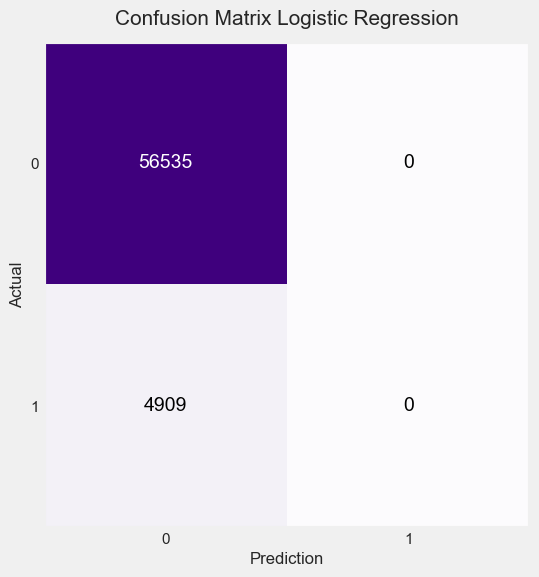

In [46]:
cmlg = confusion_matrix(y_test, y_pred_lg)
print(cmlg)
print('')
fig, ax = plot_confusion_matrix(conf_mat=cmlg, figsize=(6, 6), cmap=plt.cm.Purples)
plt.xlabel('Prediction', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.title('Confusion Matrix Logistic Regression', fontsize=15, pad=12)
plt.show()

### Hyperparameter Tuning

In [47]:
from sklearn.model_selection import RandomizedSearchCV

penalty = ['l1', 'l2']
C = [float(x) for x in np.linspace(0.0001, 0.05, 100)]
hyperparameters = dict(penalty=penalty, C=C)

logreg = LogisticRegression()
logregrs = RandomizedSearchCV(logreg, hyperparameters, scoring='precision', random_state=42, cv=5, n_iter=50)
logregrs.fit(X_train, y_train)
lgmodelbest = logregrs.best_estimator_
eval_classification(lgmodelbest)

Accuracy (Test Set): 0.92
Accuracy (Train Set): 0.92
Precision (Test Set): 0.00
Precision (Train Set): 0.00
Recall (Test Set): 0.00
Recall (Train Set): 0.00
F1-Score (Test Set): 0.00
F1-Score (Train Set): 0.00
roc_auc (test-proba): 0.50
roc_auc (train-proba): 0.50
roc_auc (crossval train): 1.0
roc_auc (crossval test): 0.7117056653840124


### **K-Nearest Neighbor**

---

In [48]:
from sklearn.neighbors import KNeighborsClassifier # import knn dari sklearn
knn = KNeighborsClassifier() # inisiasi object dengan nama knn
knnmodel = knn.fit(X_train, y_train) # fit model KNN dari data train
eval_classification(knnmodel)

Accuracy (Test Set): 0.92
Accuracy (Train Set): 0.92
Precision (Test Set): 0.10
Precision (Train Set): 0.62
Recall (Test Set): 0.01
Recall (Train Set): 0.04
F1-Score (Test Set): 0.01
F1-Score (Train Set): 0.08
roc_auc (test-proba): 0.50
roc_auc (train-proba): 0.88
roc_auc (crossval train): 1.0
roc_auc (crossval test): 0.7119101719428486


In [49]:
y_pred_knn_prob = knnmodel.predict_proba(X_test)[:,1]
y_pred_knn = knnmodel.predict(X_test)

[[56225   310]
 [ 4874    35]]



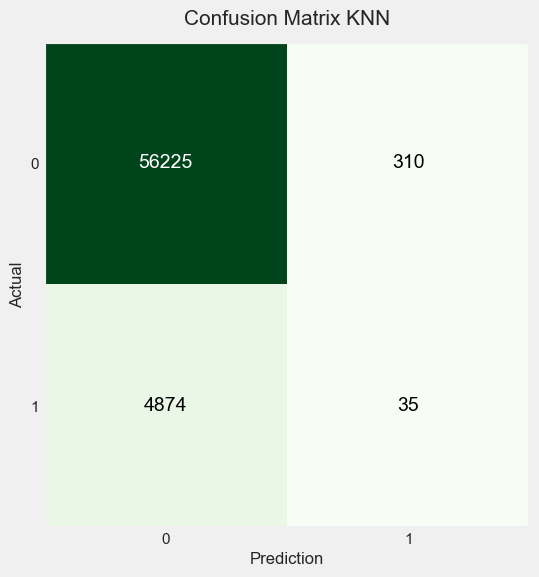

In [50]:
cmknn = confusion_matrix(y_test, y_pred_knn)
print(cmknn)
print('')
fig, ax = plot_confusion_matrix(conf_mat=cmknn, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Prediction', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.title('Confusion Matrix KNN', fontsize=15, pad=12)
plt.show()

### Hyperparameter Tuning

In [51]:
n_neighbors = list(range(1,30))
p=[1,2]
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
hyperparameters = dict(n_neighbors=n_neighbors, p=p, algorithm=algorithm)

knnmodel = knn.fit(X_train, y_train)
knnrs = RandomizedSearchCV(knnmodel, hyperparameters, scoring='precision', random_state=42, cv=5)
knnrs.fit(X_train, y_train)
knnmodelbest = knnrs.best_estimator_
eval_classification(knnmodelbest)

Accuracy (Test Set): 0.92
Accuracy (Train Set): 0.92
Precision (Test Set): 0.10
Precision (Train Set): 0.71
Recall (Test Set): 0.00
Recall (Train Set): 0.01
F1-Score (Test Set): 0.00
F1-Score (Train Set): 0.01
roc_auc (test-proba): 0.51
roc_auc (train-proba): 0.86
roc_auc (crossval train): 1.0
roc_auc (crossval test): 0.7128317784891662


### **Decision Tree**

---

In [52]:
dt = DecisionTreeClassifier() # inisiasi object dengan nama dt
dtmodel = dt.fit(X_train, y_train) # fit model decision tree dari data train
eval_classification(dtmodel)

Accuracy (Test Set): 0.85
Accuracy (Train Set): 1.00
Precision (Test Set): 0.14
Precision (Train Set): 1.00
Recall (Test Set): 0.17
Recall (Train Set): 1.00
F1-Score (Test Set): 0.15
F1-Score (Train Set): 1.00
roc_auc (test-proba): 0.54
roc_auc (train-proba): 1.00
roc_auc (crossval train): 1.0
roc_auc (crossval test): 0.7117911060224078


In [53]:
y_pred_dt_prob = dtmodel.predict_proba(X_test)[:,1]
y_pred_dt = dtmodel.predict(X_test)

[[51488  5047]
 [ 4096   813]]



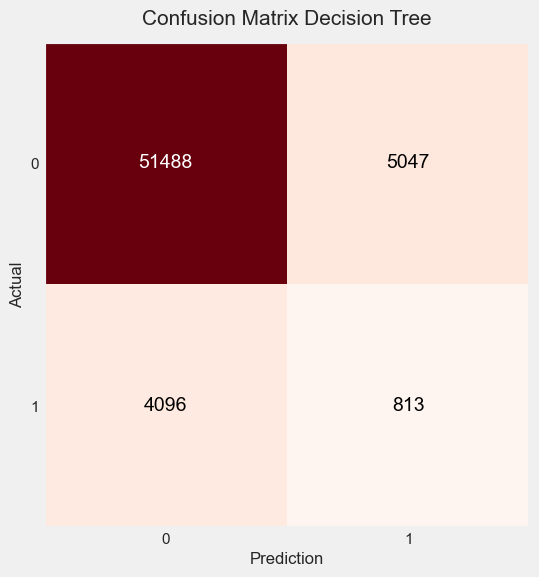

In [54]:
cmdt = confusion_matrix(y_test, y_pred_dt)
print(cmdt)
print('')
fig, ax = plot_confusion_matrix(conf_mat=cmdt, figsize=(6, 6), cmap=plt.cm.Reds)
plt.xlabel('Prediction', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.title('Confusion Matrix Decision Tree', fontsize=15, pad=12)
plt.show()

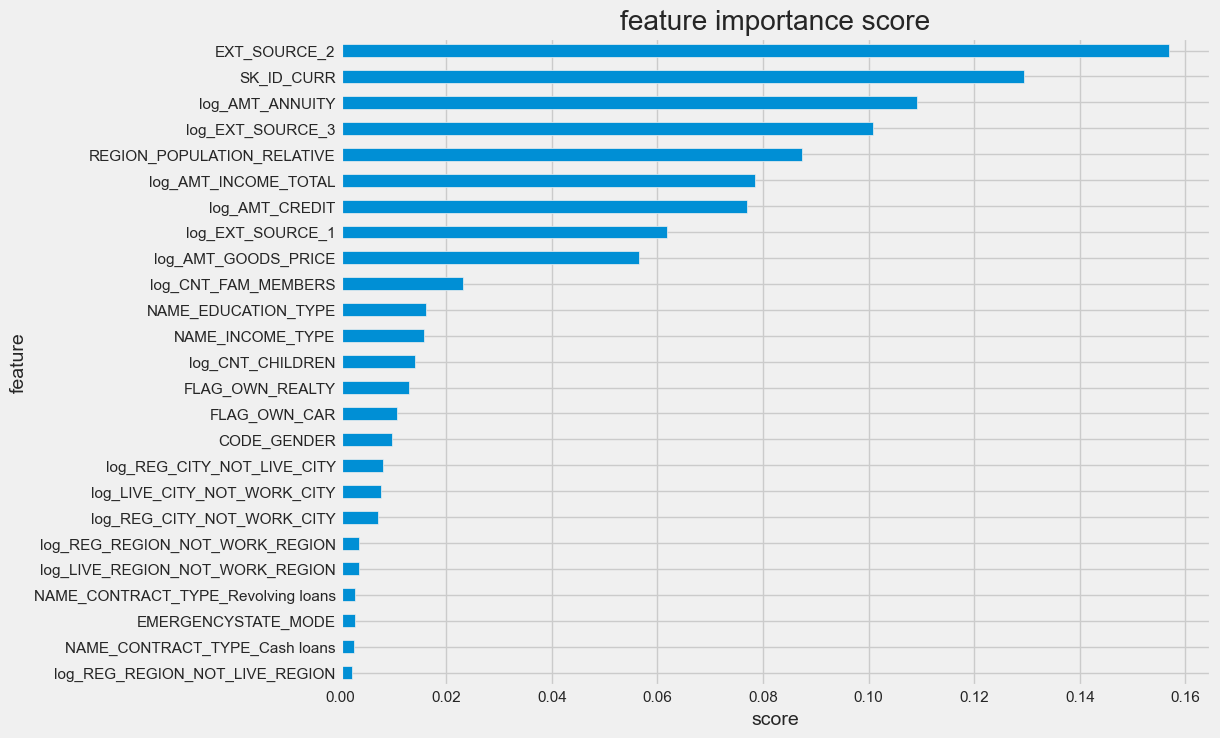

In [55]:
show_feature_importance(dtmodel)

### Hyperparameter Tuning

In [56]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(1, 200, 50)]
criterion = ['gini', 'entropy']
max_depth = [int(x) for x in np.linspace(2, 100, 50)]
min_samples_split = [int(x) for x in np.linspace(2, 20, 10)]
min_samples_leaf = [int(x) for x in np.linspace(2, 20, 10)]
hyperparameters = dict(n_estimators=n_estimators, criterion=criterion, max_depth=max_depth,
                       min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)

rf = RandomForestClassifier(random_state=42)
rfrs = RandomizedSearchCV(rf, hyperparameters, scoring='precision', random_state=42, cv=5)
rfrs.fit(X_train, y_train)
rsmodelbest = rfrs.best_estimator_
y_pred_rs2 = rsmodelbest.predict(X_test)
y_pred_rs2_prob= rsmodelbest.predict_proba(X_test)[:,1]
eval_classification(rsmodelbest)

Accuracy (Test Set): 0.92
Accuracy (Train Set): 0.92
Precision (Test Set): 0.50
Precision (Train Set): 0.99
Recall (Test Set): 0.00
Recall (Train Set): 0.01
F1-Score (Test Set): 0.00
F1-Score (Train Set): 0.02
roc_auc (test-proba): 0.74
roc_auc (train-proba): 0.95
roc_auc (crossval train): 1.0
roc_auc (crossval test): 0.7114473521591023


### **XGBoost**

---

In [57]:
from xgboost import XGBClassifier

xg = XGBClassifier()
xgmodel = xg.fit(X_train, y_train)
eval_classification(xgmodel)

Accuracy (Test Set): 0.92
Accuracy (Train Set): 0.92
Precision (Test Set): 0.48
Precision (Train Set): 0.76
Recall (Test Set): 0.02
Recall (Train Set): 0.04
F1-Score (Test Set): 0.05
F1-Score (Train Set): 0.08
roc_auc (test-proba): 0.74
roc_auc (train-proba): 0.83
roc_auc (crossval train): 1.0
roc_auc (crossval test): 0.713185642099557


In [58]:
y_pred_xg_prob = xgmodel.predict_proba(X_test)[:,1]
y_pred_xg = xgmodel.predict(X_test)

[[56409   126]
 [ 4792   117]]



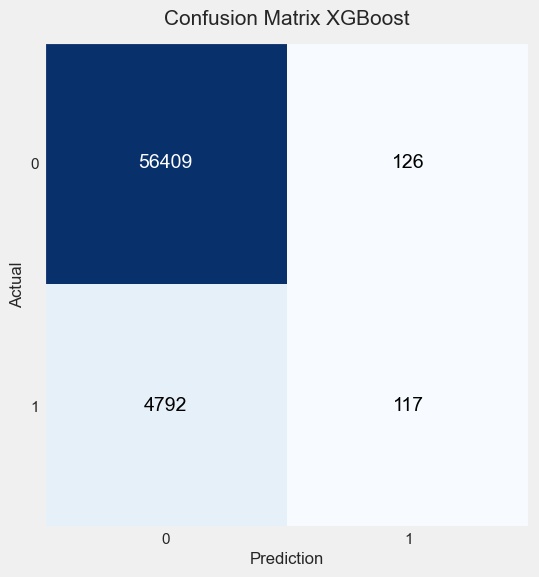

In [59]:
cmxg = confusion_matrix(y_test, y_pred_xg)
print(cmxg)
print('')
fig, ax = plot_confusion_matrix(conf_mat=cmxg, figsize=(6, 6), cmap=plt.cm.Blues)
plt.xlabel('Prediction', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.title('Confusion Matrix XGBoost', fontsize=15, pad=12)
plt.show()

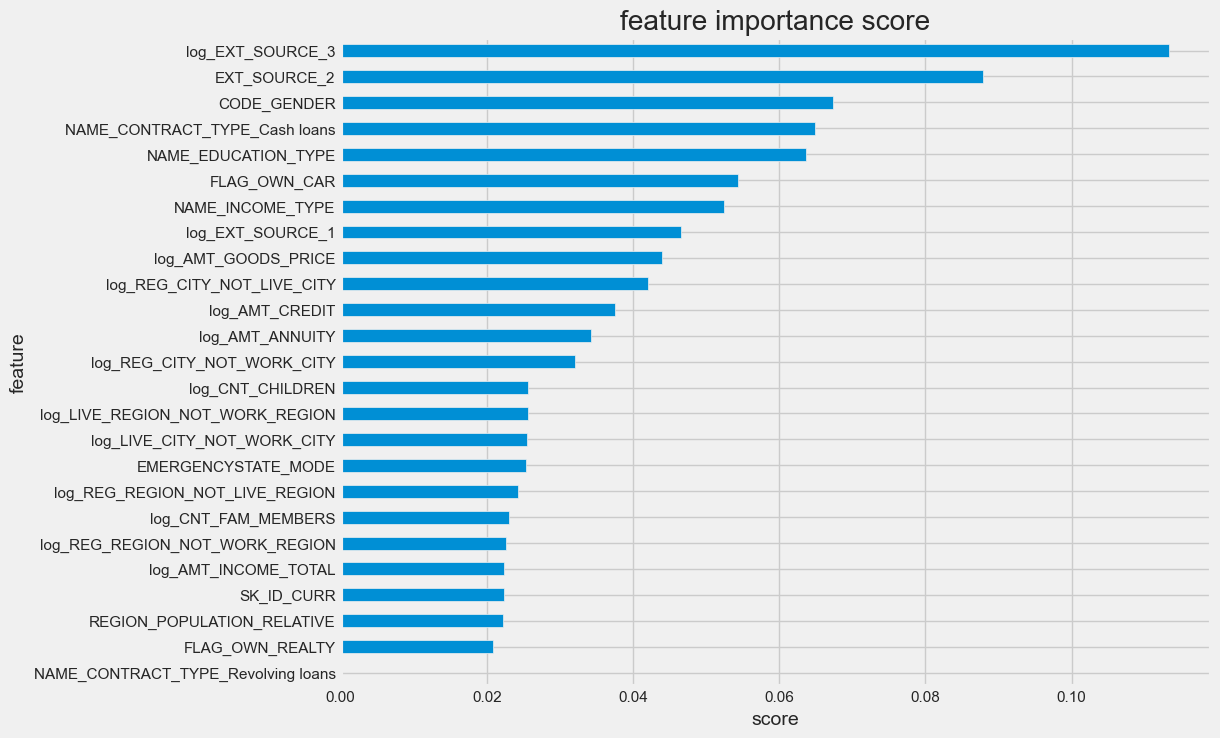

In [60]:
show_feature_importance(xgmodel)

### Hyperparameter Tuning

In [61]:
parameter = {
            'max_depth' : [int(x) for x in np.linspace(10, 110, num = 11)],
            'min_child_weight' : [int(x) for x in np.linspace(1, 20, num = 11)],
            'gamma' : [float(x) for x in np.linspace(0, 1, num = 11)],
            'tree_method' : ['auto', 'exact', 'approx', 'hist'],
            'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num = 11)],
            'eta' : [float(x) for x in np.linspace(0, 1, num = 100)],
            'lambda' : [float(x) for x in np.linspace(0, 1, num = 11)],
            'alpha' : [float(x) for x in np.linspace(0, 1, num = 11)]
            }

xgmodel2 = RandomizedSearchCV(xg, parameter, cv=3, n_jobs = -1 , verbose = 1, scoring='precision', random_state=42)
xgmodel2.fit(X_train,y_train)
xgmodelbest = xgmodel2.best_estimator_
y_pred_xg2 = xgmodelbest.predict(X_test)
y_pred_xg2_prob= xgmodelbest.predict_proba(X_test)[:,1]
eval_classification(xgmodelbest)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


Accuracy (Test Set): 0.92
Accuracy (Train Set): 0.92
Precision (Test Set): 1.00
Precision (Train Set): 1.00
Recall (Test Set): 0.00
Recall (Train Set): 0.00
F1-Score (Test Set): 0.00
F1-Score (Train Set): 0.00
roc_auc (test-proba): 0.75
roc_auc (train-proba): 0.87
roc_auc (crossval train): 1.0
roc_auc (crossval test): 0.712746462521828


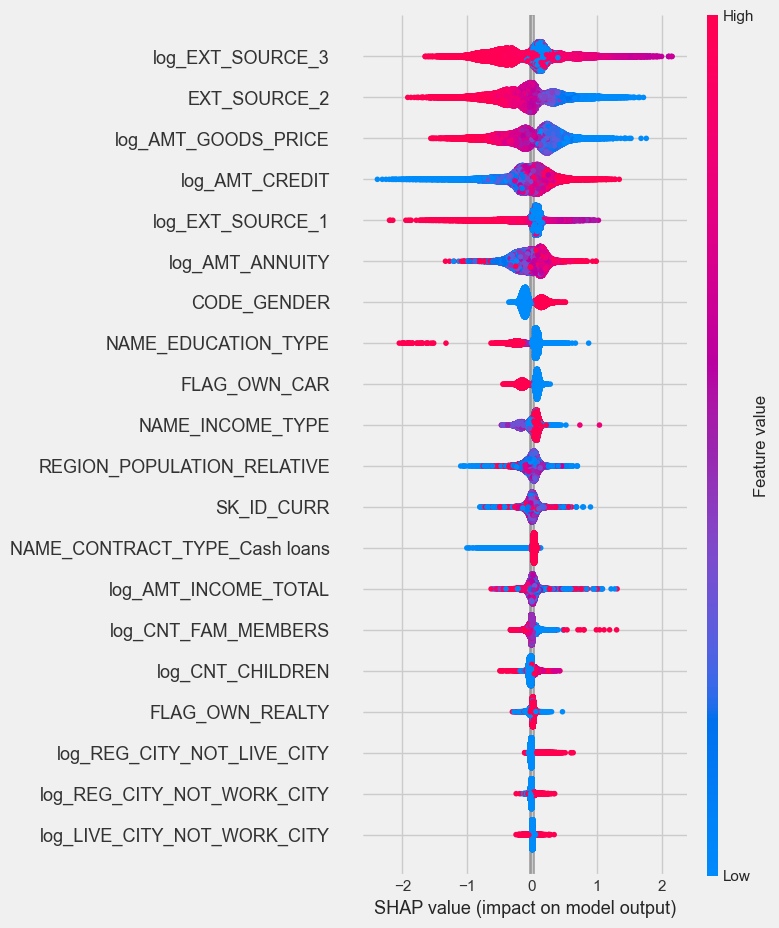

In [62]:
import shap

# Melihat shap value tiap features
explainer = shap.TreeExplainer(xgmodel)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)